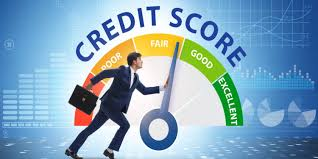

# Dataset

**Problem Statement**

- You are working as a data scientist in a global finance company. Over the years, the company has collected basic bank details and gathered a lot of credit-related information. The management wants to build an intelligent system to segregate the people into credit score brackets to reduce the manual efforts.

**Task**
- Given a person’s credit-related information, build a machine learning and deep learning model that can classify the credit score.

**ID:** A unique identifier for the individual.

**Customer_ID:** Customer identification number.

**Month:** The month in which the data was obtained.

**Name:** Name of the customer.

**Age:** Age of the customer.

**Occupation:** Occupation of the customer.

**Annual_Income:** Annual income of the individual.

**Annual_Income:** The Annual Income of the person

**Monthly_Inhand_Salary:** Monthly in-hand salary of the person

**Num_Bank_Accounts:** The number of bank accounts of the person

**Num_Credit_Card:** Number of credit cards the person is having

**Interest_Rate:** The interest rate on the credit card of the person

**Num_of_Loan:** The number of loans taken by the person from the bank

**Type_of_Loan:** The types of loans taken by the person from the bank

**Delay_from_due_date:** The average number of days delayed by the person from the date of payment

**Num_of_Delayed_Payment:** Number of payments delayed by the person

**Changed_Credit_Card:** The percentage change in the credit card limit of the person

**Num_Credit_Inquiries:** The number of credit card inquiries by the person

**Credit_Mix:** Classification of Credit Mix of the customer

**Outstanding_Debt:** The outstanding balance of the person

**Credit_Utilization_Ratio:** The credit utilization ratio of the credit card of the customer

**Credit_History_Age:** The age of the credit history of the person

**Payment_of_Min_Amount:** Yes if the person paid the minimum amount to be paid only, otherwise no.

**Total_EMI_per_month:** The total EMI per month of the person

**Amount_invested_monthly:** The monthly amount invested by the person

**Payment_Behaviour:** The payment behaviour of the person

**Monthly_Balance:** The monthly balance left in the account of the person

**Credit_Score:** The credit score of the person


# Packages Importing and Loading Files

In [681]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE

In [682]:
# Specify the file path 
file_path = "Credit_score_datasets/train.csv"

# Read the CSV file
df1 = pd.read_csv(file_path)
df1.head() 

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12               1824.843                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12               1824.843                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                   26.823  22 Years and 1 Months   
1            809.98                   31.945                    NaN   
2            809.98                   28.609  22 Years and 3 Months   
3            809.98                   31.378  22 Years and 4 Months   
4            809.98                   24.797  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No              49.575       80.41529543900253   
1                     No              49.575      118.28022162236736   
2                     No              49.575         81.699521264648   
3                     No              49.575       199.4580743910713   
4                     No              49.575      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [683]:
df = df1.copy()

# Exploratory Data Analysis (EDA)

Let's plunge into dataset.

In [684]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [685]:
df.shape

(100000, 28)

In [686]:
df.describe().T

count     mean      std     min      25%  \
Monthly_Inhand_Salary     84998.000 4194.171 3183.686 303.645 1625.568   
Num_Bank_Accounts        100000.000   17.091  117.405  -1.000    3.000   
Num_Credit_Card          100000.000   22.474  129.057   0.000    4.000   
Interest_Rate            100000.000   72.466  466.423   1.000    8.000   
Delay_from_due_date      100000.000   21.069   14.860  -5.000   10.000   
Num_Credit_Inquiries      98035.000   27.754  193.177   0.000    3.000   
Credit_Utilization_Ratio 100000.000   32.285    5.117  20.000   28.053   
Total_EMI_per_month      100000.000 1403.118 8306.041   0.000   30.307   

                              50%      75%       max  
Monthly_Inhand_Salary    3093.745 5957.448 15204.633  
Num_Bank_Accounts           6.000    7.000  1798.000  
Num_Credit_Card             5.000    7.000  1499.000  
Interest_Rate              13.000   20.000  5797.000  
Delay_from_due_date        18.000   28.000    67.000  
Num_Credit_Inquiries        6.000    9.000  2597.000  
Credit_Utilization_Ratio   32.306   36.497    50.000  
Total_EMI_per_month        69.249  161.224 82331.000

In [687]:
df.describe(include="object").T

count  unique                               top  \
ID                       100000  100000                            0x1602   
Customer_ID              100000   12500                         CUS_0xd40   
Month                    100000       8                           January   
Name                      90015   10139                            Langep   
Age                      100000    1788                                38   
SSN                      100000   12501                         #F%$D@*&8   
Occupation               100000      16                           _______   
Annual_Income            100000   18940                          36585.12   
Num_of_Loan              100000     434                                 3   
Type_of_Loan              88592    6260                     Not Specified   
Num_of_Delayed_Payment    92998     749                                19   
Changed_Credit_Limit     100000    4384                                 _   
Credit_Mix               100000       4                          Standard   
Outstanding_Debt         100000   13178                           1360.45   
Credit_History_Age        90970     404            15 Years and 11 Months   
Payment_of_Min_Amount    100000       3                               Yes   
Amount_invested_monthly   95521   91049                         __10000__   
Payment_Behaviour        100000       7    Low_spent_Small_value_payments   
Monthly_Balance           98800   98792  __-333333333333333333333333333__   
Credit_Score             100000       3                          Standard   

                          freq  
ID                           1  
Customer_ID                  8  
Month                    12500  
Name                        44  
Age                       2833  
SSN                       5572  
Occupation                7062  
Annual_Income               16  
Num_of_Loan              14386  
Type_of_Loan              1408  
Num_of_Delayed_Payment    5327  
Changed_Credit_Limit      2091  
Credit_Mix               36479  
Outstanding_Debt            24  
Credit_History_Age         446  
Payment_of_Min_Amount    52326  
Amount_invested_monthly   4305  
Payment_Behaviour        25513  
Monthly_Balance              9  
Credit_Score             53174

In [688]:
# missing value control
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [689]:
df.duplicated().sum()

0

There is no duplicated row !

In [690]:
# Unique value control
output_data = []

for col in df.columns:
    
    # If the number of unique values in the column is less than or equal to 5
    if df.loc[:, col].nunique() <= 5:
        # Get the unique values in the column
        unique_values = df.loc[:, col].unique()
        # Append the column name, number of unique values, unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
    else:
        # Otherwise, append only the column name, number of unique values, and data type to the output data
        output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

output_df

Column Name  Number of Unique Values  \
0                         ID                   100000   
1                Customer_ID                    12500   
2                      Month                        8   
3                       Name                    10139   
4                        Age                     1788   
5                        SSN                    12501   
6                 Occupation                       16   
7              Annual_Income                    18940   
8      Monthly_Inhand_Salary                    13235   
9          Num_Bank_Accounts                      943   
10           Num_Credit_Card                     1179   
11             Interest_Rate                     1750   
12               Num_of_Loan                      434   
13              Type_of_Loan                     6260   
14       Delay_from_due_date                       73   
15    Num_of_Delayed_Payment                      749   
16      Changed_Credit_Limit                     4384   
17      Num_Credit_Inquiries                     1223   
18                Credit_Mix                        4   
19          Outstanding_Debt                    13178   
20  Credit_Utilization_Ratio                   100000   
21        Credit_History_Age                      404   
22     Payment_of_Min_Amount                        3   
23       Total_EMI_per_month                    14950   
24   Amount_invested_monthly                    91049   
25         Payment_Behaviour                        7   
26           Monthly_Balance                    98792   
27              Credit_Score                        3   

              Unique Values  Data Type  
0                          -    object  
1                          -    object  
2                          -    object  
3                          -    object  
4                          -    object  
5                          -    object  
6                          -    object  
7                          -    object  
8                          -   float64  
9                          -     int64  
10                         -     int64  
11                         -     int64  
12                         -    object  
13                         -    object  
14                         -     int64  
15                         -    object  
16                         -    object  
17                         -   float64  
18  [_, Good, Standard, Bad]    object  
19                         -    object  
20                         -   float64  
21                         -    object  
22             [No, NM, Yes]    object  
23                         -   float64  
24                         -    object  
25                         -    object  
26                         -    object  
27    [Good, Standard, Poor]    object

In [691]:
# value counts and percentages
def value_cnt(df, column_name):
    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True).round(3)

    vc = vc.rename_axis('workclass').reset_index(name='counts')
    vc_norm = vc_norm.rename_axis('workclass').reset_index(name='norm_counts')

    df_result = pd.concat([vc['workclass'], vc['counts'], vc_norm['norm_counts']], axis=1)
    
    return df_result

value_cnt(df, 'Credit_Score')

workclass  counts  norm_counts
0  Standard   53174        0.532
1      Poor   28998        0.290
2      Good   17828        0.178

In [692]:
object_col = df.describe(include='O').columns
object_col

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Num_of_Loan', 'Type_of_Loan',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_History_Age', 'Payment_of_Min_Amount',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [693]:
for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(df[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')

Column Name: ID
****************************************
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
Name
NaN               9985
Stevex  

## Drop Columns

In [694]:
# dropping unnecessary columns for modelling
df = df.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan',
             'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis=1)

In [695]:
df.head()

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0    23  Scientist      19114.12                  3                4   
1    23  Scientist      19114.12                  3                4   
2  -500  Scientist      19114.12                  3                4   
3    23  Scientist      19114.12                  3                4   
4    23  Scientist      19114.12                  3                4   

   Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
0              3           4                    3                      7   
1              3           4                   -1                    NaN   
2              3           4                    3                      7   
3              3           4                    5                      4   
4              3           4                    6                    NaN   

   Num_Credit_Inquiries Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0                 4.000          _           809.98                    26.823   
1                 4.000       Good           809.98                    31.945   
2                 4.000       Good           809.98                    28.609   
3                 4.000       Good           809.98                    31.378   
4                 4.000       Good           809.98                    24.797   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No               49.575   
1                    NaN                    No               49.575   
2  22 Years and 3 Months                    No               49.575   
3  22 Years and 4 Months                    No               49.575   
4  22 Years and 5 Months                    No               49.575   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good

In [696]:
df = df.replace("_", "", regex=True)
df[df.eq('').any(axis=1)] 

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
0      23  Scientist      19114.12                  3                4   
8      28                 34847.84                  2                4   
10     28    Teacher      34847.84                  2             1385   
16     34                143162.64                  1                5   
18     34                143162.64                  1                5   
...    ..        ...           ...                ...              ...   
99989  28                 20002.88                 10                8   
99992  24   Mechanic      39628.99                  4                6   
99994  25   Mechanic      39628.99                  4                6   
99995  25   Mechanic      39628.99                  4                6   
99996  25   Mechanic      39628.99                  4                6   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
0                  3           4                    3                      7   
8                  6           1                    3                      4   
10                 6           1                    3                     -1   
16                 8           3                    5                      8   
18                 8           3                    8                      7   
...              ...         ...                  ...                    ...   
99989             29           5                   33                     25   
99992              7           2                   23                    NaN   
99994              7           2                   20                      6   
99995              7           2                   23                      7   
99996              7           2                   18                      7   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
0                     4.000                      809.98   
8                     2.000       Good           605.03   
10                    2.000                      605.03   
16                    3.000       Good          1303.01   
18                      NaN       Good          1303.01   
...                     ...        ...              ...   
99989                 9.000        Bad           3571.7   
99992                 3.000                      502.38   
99994                 3.000                      502.38   
99995                 3.000                      502.38   
99996                 3.000                      502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                        26.823   22 Years and 1 Months                    No   
8                        24.464   26 Years and 7 Months                    No   
10                       33.225   26 Years and 9 Months                    No   
16                       28.617   17 Years and 9 Months                    No   
18                       26.520  17 Years and 11 Months                    No   
...                         ...                     ...                   ...   
99989                    33.360    6 Years and 1 Months                   Yes   
99992                    32.991   31 Years and 3 Months                    No   
99994                    39.324   31 Years and 5 Months                    No   
99995                    34.664   31 Years and 6 Months                    No   
99996                    40.566   31 Years and 7 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
0                   49.575       80.41529543900253   
8                   18.816        104.291825168246   
10                  18.816       58.51597569589465   
16                 246.992        168.413702679309   
18                 246.992                   10000   
...                    ...                     ...   
99989               60.965       74.36660309585342   
99992               35.104       401.19648

In [697]:
rows_with_empty_values = df[df.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
df.loc[rows_with_empty_values.index] = df.loc[rows_with_empty_values.index].replace('', np.nan)

In [698]:
df.dropna(inplace=True)

In [699]:
df

Age Occupation Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
2      -500  Scientist      19114.12                  3                4   
3        23  Scientist      19114.12                  3                4   
5        23  Scientist      19114.12                  3                4   
6        23  Scientist      19114.12                  3                4   
9        28    Teacher      34847.84                  2                4   
...     ...        ...           ...                ...              ...   
99985    28  Architect      20002.88                 10                8   
99986    28  Architect      20002.88                 10                8   
99991    29  Architect      20002.88                 10                8   
99997    25   Mechanic      39628.99                  4                6   
99999    25   Mechanic      39628.99                  4                6   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
2                  3           4                    3                      7   
3                  3           4                    5                      4   
5                  3           4                    8                      4   
6                  3           4                    3                      8   
9                  6           1                    7                      1   
...              ...         ...                  ...                    ...   
99985             29           5                   33                     25   
99986             29           5                   33                     25   
99991             29           5                   33                     25   
99997           5729           2                   27                      6   
99999              7           2                   18                      6   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
2                     4.000       Good           809.98   
3                     4.000       Good           809.98   
5                     4.000       Good           809.98   
6                     4.000       Good           809.98   
9                     2.000       Good           605.03   
...                     ...        ...              ...   
99985                 9.000        Bad           3571.7   
99986                 9.000        Bad           3571.7   
99991                 9.000        Bad           3571.7   
99997                 3.000       Good           502.38   
99999                 3.000       Good           502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
2                        28.609   22 Years and 3 Months                    No   
3                        31.378   22 Years and 4 Months                    No   
5                        27.262   22 Years and 6 Months                    No   
6                        22.538   22 Years and 7 Months                    No   
9                        38.551   26 Years and 8 Months                    No   
...                         ...                     ...                   ...   
99985                    39.773    5 Years and 9 Months                   Yes   
99986                    24.714   5 Years and 10 Months                   Yes   
99991                    37.141    6 Years and 3 Months                   Yes   
99997                    41.256   31 Years and 8 Months                    No   
99999                    34.192  31 Years and 10 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
2                   49.575         81.699521264648   
3                   49.575       199.4580743910713   
5                   49.575      62.430172331195294   
6                   49.575       178.3440674122349   
9                   18.816       40.39123782853101   
...                    ...                     ...   
99985            12112.000       148.2752327451465   
99986               

## Data Formatting

There are some features in the wrong format. We have to fix it.

### Age 

In [700]:
df['Age'] = df['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

In [701]:
df.Age

2        500
3         23
5         23
6         23
9         28
        ... 
99985     28
99986     28
99991     29
99997     25
99999     25
Name: Age, Length: 57984, dtype: int32

<Axes: ylabel='Age'>

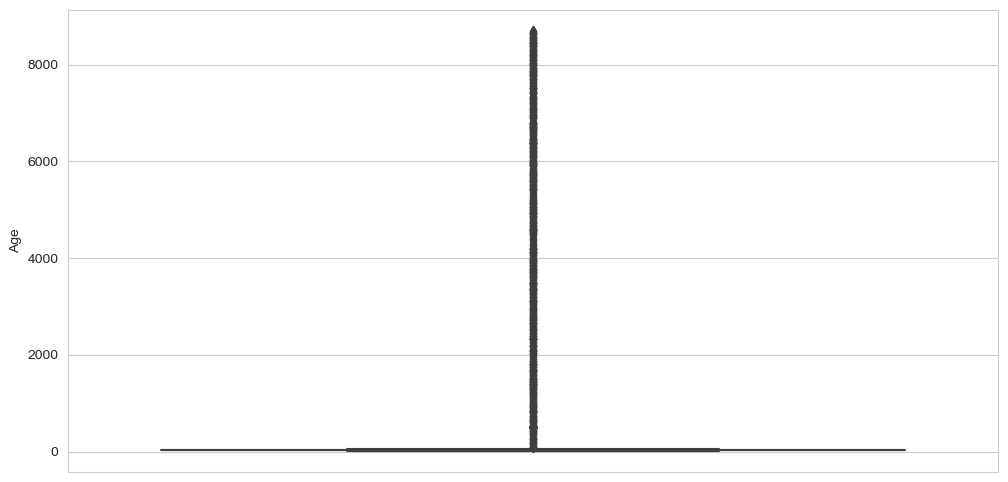

In [702]:
# 'Age' sütununun kutu grafiğini çizdirme
sns.boxplot(y='Age', data=df)

In [703]:
# Yaş sütununda değeri 85'den büyük olan satırları filtreleyerek veri çerçevesinden çıkarın
df = df[df['Age'] <= 85]

In [704]:
df.Age

3        23
5        23
6        23
9        28
11       28
         ..
99985    28
99986    28
99991    29
99997    25
99999    25
Name: Age, Length: 56355, dtype: int32

<Axes: ylabel='Age'>

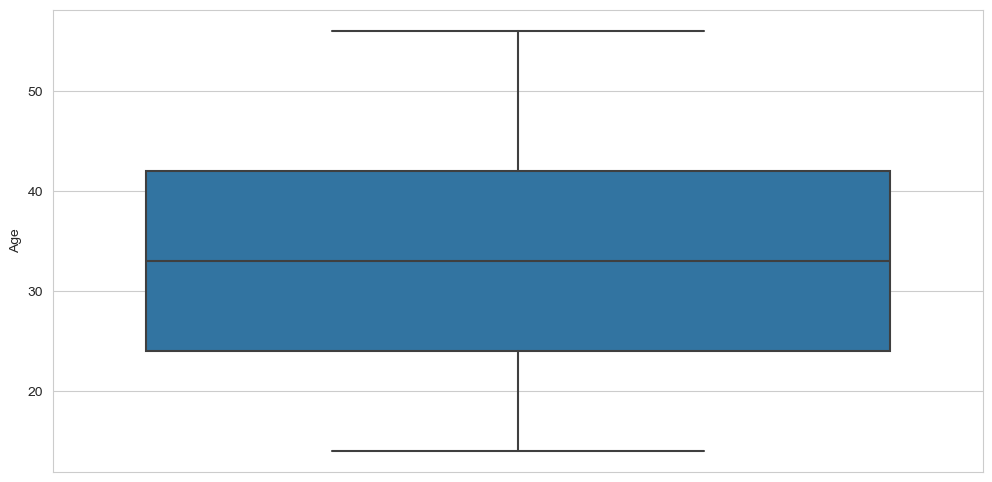

In [705]:
sns.boxplot(y='Age', data=df)

In [706]:
df.Age.value_counts().sort_index()

Age
14     710
15     898
16     873
17     880
18    1479
19    1635
20    1589
21    1587
22    1628
23    1554
24    1530
25    1613
26    1707
27    1654
28    1708
29    1590
30    1591
31    1681
32    1630
33    1472
34    1617
35    1710
36    1658
37    1598
38    1698
39    1585
40    1485
41    1655
42    1500
43    1599
44    1666
45    1506
46     968
47     733
48     776
49     776
50     746
51     761
52     761
53     768
54     775
55     811
56     194
Name: count, dtype: int64

### Occupation

In [707]:
df.Occupation.value_counts()

Occupation
Lawyer          3993
Engineer        3841
Accountant      3836
Scientist       3819
Mechanic        3816
Architect       3806
Teacher         3804
MediaManager    3784
Entrepreneur    3758
Developer       3747
Doctor          3717
Journalist      3693
Manager         3597
Musician        3590
Writer          3554
Name: count, dtype: int64

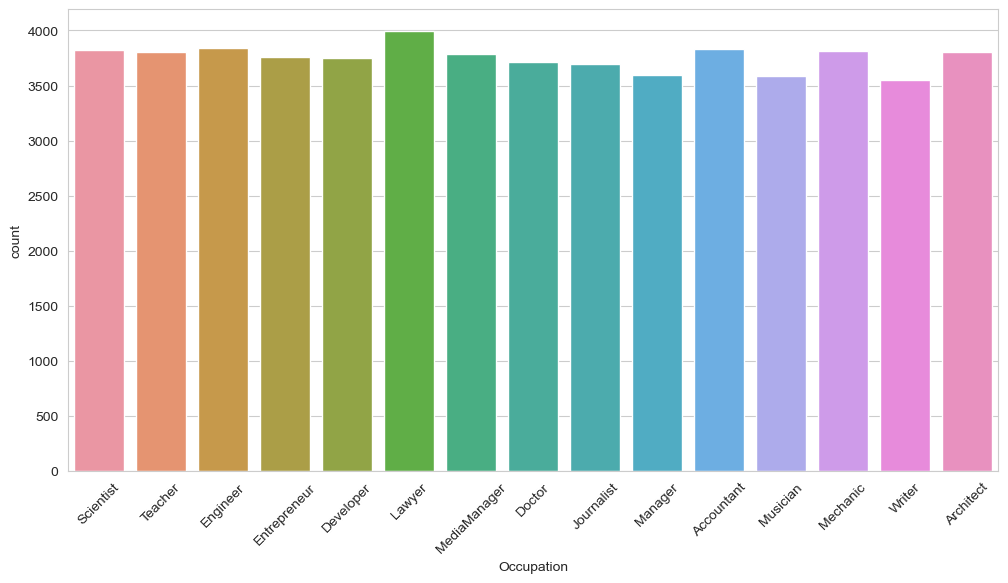

In [708]:
sns.countplot(data = df ,x ='Occupation')
plt.xticks(rotation=45)
plt.show()

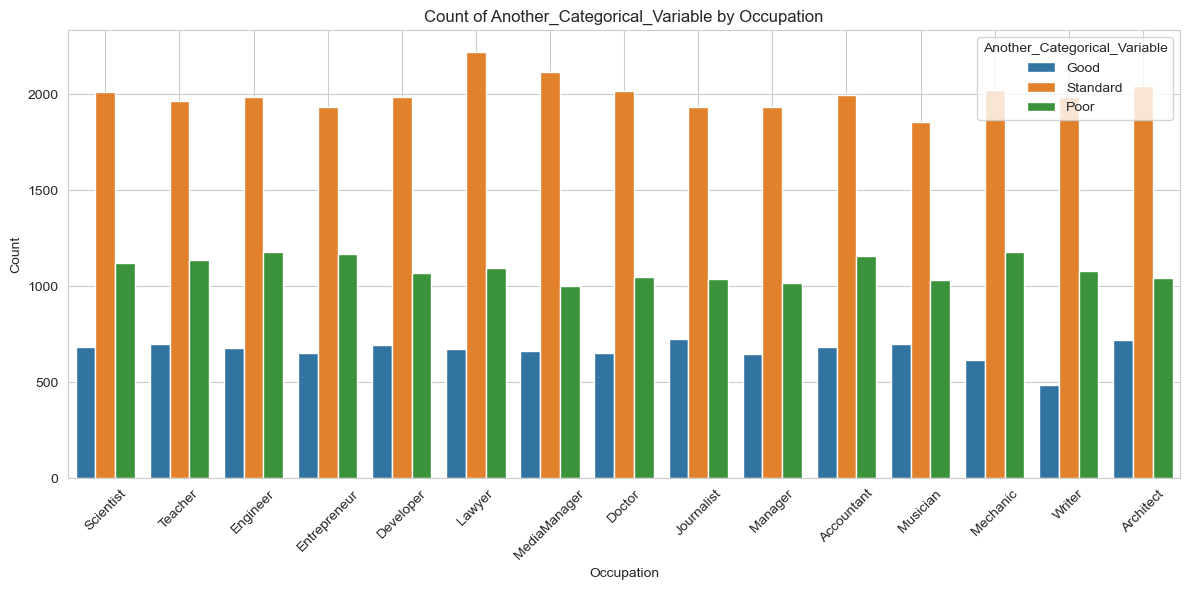

In [709]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=df)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Annual Income

In [710]:
df.Annual_Income

3        19114.12
5        19114.12
6        19114.12
9        34847.84
11       34847.84
           ...   
99985    20002.88
99986    20002.88
99991    20002.88
99997    39628.99
99999    39628.99
Name: Annual_Income, Length: 56355, dtype: object

In [711]:
df['Annual_Income'] = df['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
df['Annual_Income'] = df['Annual_Income'].astype(float)

<Axes: ylabel='Annual_Income'>

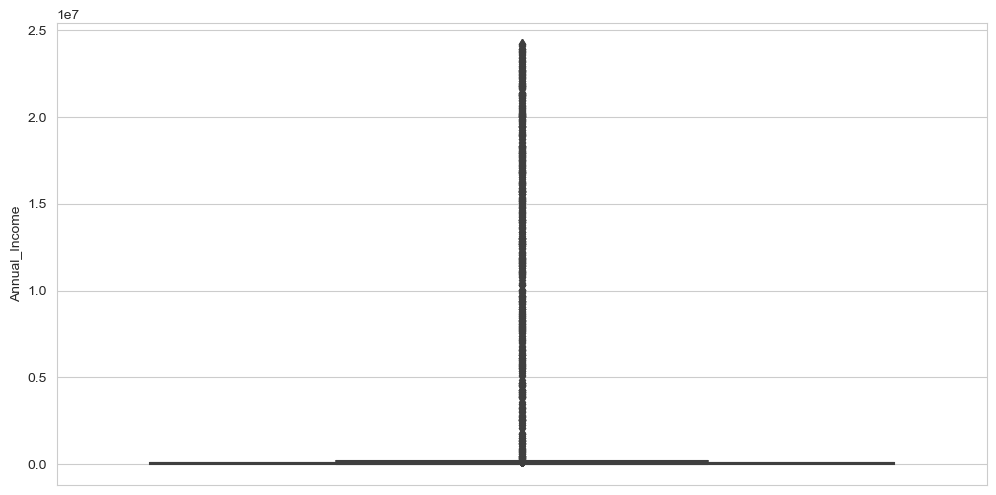

In [712]:
sns.boxplot(y='Annual_Income', data=df)

In [713]:
df.Annual_Income.sort_values()

39675       7005.930
39676       7005.930
39677       7005.930
39678       7005.930
39673       7005.930
            ...     
87771   23917742.000
27262   24105369.000
14588   24160009.000
59059   24177153.000
48302   24198062.000
Name: Annual_Income, Length: 56355, dtype: float64

In [714]:
df.Annual_Income.value_counts()

Annual_Income
17816.750       13
95596.350       12
40341.160       12
22434.160       11
36585.120        9
                ..
25145.360        1
7235378.000      1
13770119.000     1
11831701.000     1
18138374.000     1
Name: count, Length: 13047, dtype: int64

In [715]:
import plotly.express as px

fig = px.line(df,color="Credit_Score", y="Annual_Income")
fig.show()

In [716]:
fig = px.box(df, x="Credit_Score", y="Annual_Income")

fig.show()

### Num_Bank_Accounts

In [717]:
df.Num_Bank_Accounts

3         3
5         3
6         3
9         2
11        2
         ..
99985    10
99986    10
99991    10
99997     4
99999     4
Name: Num_Bank_Accounts, Length: 56355, dtype: int64

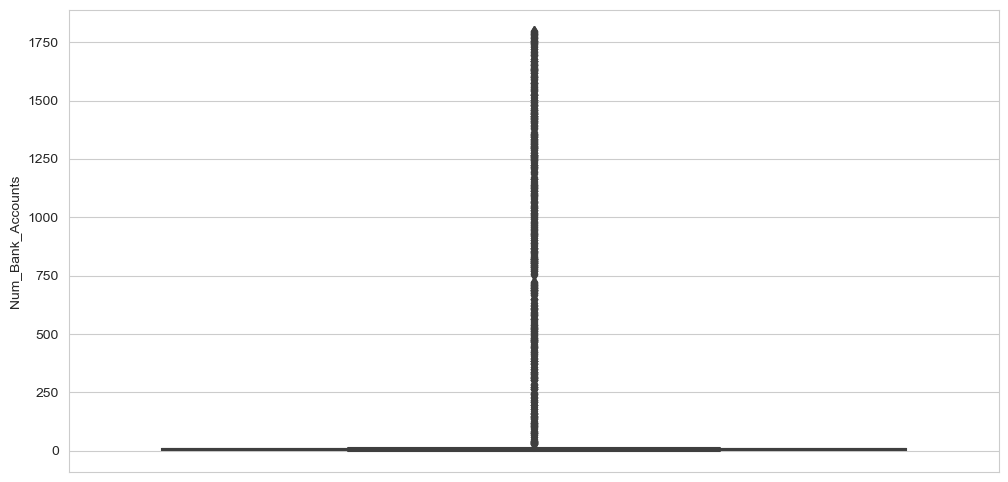

In [718]:
sns.boxplot(y='Num_Bank_Accounts', data=df);

In [719]:
df.Num_Bank_Accounts.value_counts().sort_values

<bound method Series.sort_values of Num_Bank_Accounts
6       7354
7       7323
8       7130
3       6846
4       6844
        ... 
882        1
865        1
1594       1
974        1
697        1
Name: count, Length: 583, dtype: int64>

In [720]:
df[df.Num_Bank_Accounts<0]

Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
30330   39   Engineer     128305.760                 -1                6   
30331   40   Engineer     128305.760                 -1                6   
30332   40   Engineer     128305.760                 -1                6   
30333   40   Engineer     128305.760                 -1                6   
43689   54   Engineer     117851.070                 -1                6   
43690   54   Engineer     117851.070                 -1                6   
43691   54   Engineer     117851.070                 -1                6   
43693   54   Engineer     117851.070                 -1                6   
43694   54   Engineer     117851.070                 -1                6   
43695   54   Engineer     117851.070                 -1                6   
47215   36     Lawyer      22312.070                 -1                3   
55636   40  Developer      30352.110                 -1              165   
55637   40  Developer      30352.110                 -1                4   
55638   41  Developer      30352.110                 -1                4   
55639   41  Developer      30352.110                 -1                4   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
30330              1           2                    5                      3   
30331              1           2                    5                      6   
30332              1           2                    1                      8   
30333              1           2                    5                      6   
43689              7           0                   27                      1   
43690              7           0                   27                      1   
43691              7           0                   27                      1   
43693              7           0                   22                      1   
43694              7           0                   27                      1   
43695              7           0                   27                      1   
47215              4           3                    9                      8   
55636              7           1                    8                      3   
55637              7        -100                    8                      3   
55638              7           1                   11                      3   
55639              7           1                    8                      4   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
30330                 6.000       Good           1151.7   
30331                 6.000       Good           1151.7   
30332                 6.000       Good           1151.7   
30333                 6.000       Good           1151.7   
43689                 1.000       Good           607.78   
43690                 1.000       Good           607.78   
43691                 1.000       Good           607.78   
43693                 1.000       Good           607.78   
43694                 1.000       Good           607.78   
43695                 1.000       Good           607.78   
47215                 3.000       Good            51.37   
55636                 0.000       Good           644.57   
55637                 0.000       Good           644.57   
55638                 0.000       Good           644.57   
55639                 0.000       Good           644.57   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
30330                    40.587   22 Years and 5 Months                    No   
30331                    39.369   22 Years and 6 Months                    No   
30332                    28.702   22 Years and 7 Months                    No   
30333                    34.808   22 Years and 8 Months                    No   
43689                    37.286   20 Years and 6 Months                    No   
43690                    41.916   20 Years and 7 Months                    No 

In [721]:
df = df[df.Num_Bank_Accounts >= 0]

In [722]:
df.loc[df.Num_Bank_Accounts>12,"Num_Bank_Accounts" ].sort_values()

95861      27
69723      28
18124      28
57421      30
89822      33
         ... 
9154     1789
69059    1794
29242    1794
20277    1798
64537    1798
Name: Num_Bank_Accounts, Length: 710, dtype: int64

In [723]:
df = df[df.Num_Bank_Accounts <=12]

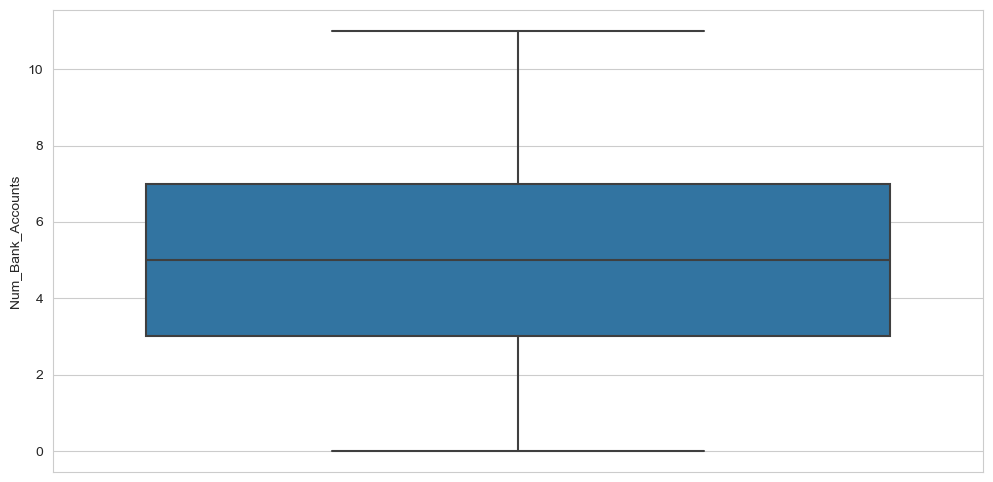

In [724]:
sns.boxplot(y='Num_Bank_Accounts', data=df);

### Num_Credit_Card

In [725]:
df.Num_Credit_Card

3        4
5        4
6        4
9        4
11       4
        ..
99985    8
99986    8
99991    8
99997    6
99999    6
Name: Num_Credit_Card, Length: 55630, dtype: int64

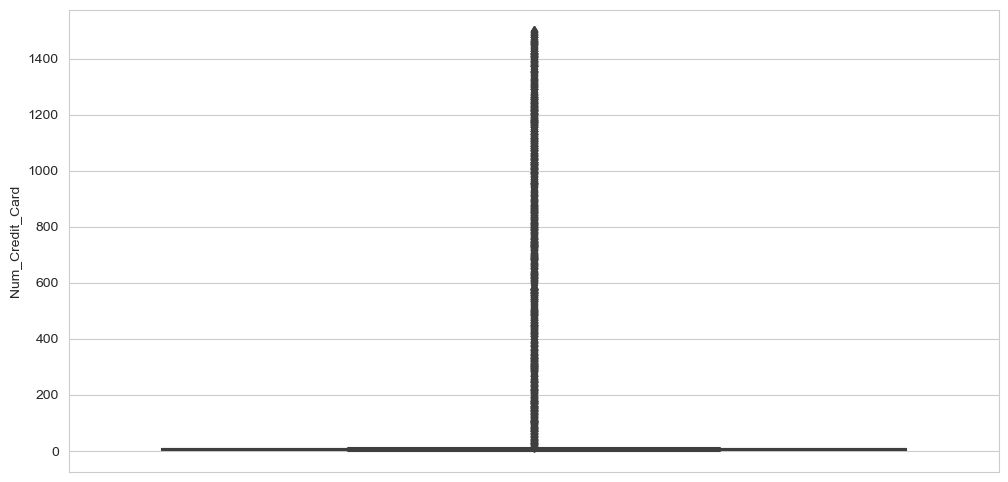

In [726]:
sns.boxplot(y='Num_Credit_Card', data=df);

In [727]:
df[df.Num_Credit_Card<0]

Empty DataFrame
Columns: [Age, Occupation, Annual_Income, Num_Bank_Accounts, Num_Credit_Card, Interest_Rate, Num_of_Loan, Delay_from_due_date, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_Mix, Outstanding_Debt, Credit_Utilization_Ratio, Credit_History_Age, Payment_of_Min_Amount, Total_EMI_per_month, Amount_invested_monthly, Payment_Behaviour, Monthly_Balance, Credit_Score]
Index: []

In [728]:
df[df['Num_Credit_Card'] > 11].sort_values(by='Num_Credit_Card', ascending=True)

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
89685   19        Lawyer      31318.840                  7               15   
10904   44     Architect      28840.470                  7               17   
66466   54  Entrepreneur     113284.840                  5               18   
76529   28    Accountant      71498.380                  4               20   
45553   21     Developer      17137.570                  8               22   
...    ...           ...            ...                ...              ...   
50637   20  MediaManager     118036.280                  3             1496   
57286   44       Manager      36127.640                  2             1497   
30807   20      Musician      75454.200                  5             1497   
72123   16     Scientist      10186.535                  8             1499   
25015   29    Accountant      14189.300                  8             1499   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
89685           2123           8                   35                     19   
10904             15           0                   10                      9   
66466              7           3                    5                     16   
76529              8           0                   15                      4   
45553            473           9                   26                     17   
...              ...         ...                  ...                    ...   
50637             13           3                   14                     18   
57286              2           0                    3                      5   
30807              8           4                    6                      9   
72123             29           5                   37                     11   
25015             23           2                   12                     11   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
89685                10.000        Bad          4286.15   
10904                 0.000   Standard           196.82   
66466                 1.000   Standard           920.25   
76529                 0.000       Good           972.14   
45553                12.000        Bad           3680.6   
...                     ...        ...              ...   
50637                 7.000   Standard            175.4   
57286                 1.000       Good            770.1   
30807                 5.000       Good          1384.43   
72123                 7.000   Standard          2484.47   
25015                12.000   Standard          1281.77   

       Credit_Utilization_Ratio     Credit_History_Age Payment_of_Min_Amount  \
89685                    37.023   9 Years and 3 Months                   Yes   
10904                    36.870  29 Years and 8 Months                   Yes   
66466                    35.072  16 Years and 6 Months                   Yes   
76529                    36.002  24 Years and 8 Months                    No   
45553                    25.084  8 Years and 10 Months                   Yes   
...                         ...                    ...                   ...   
50637                    40.602  19 Years and 3 Months                   Yes   
57286                    29.492  25 Years and 3 Months                    No   
30807                    30.959  32 Years and 6 Months                    No   
72123                    27.794  15 Years and 4 Months                   Yes   
25015                    34.227  18 Years and 9 Months                    NM   

       Total_EMI_per_month Amount_invested_monthly  \
89685              144.305       55.65697935069078   
10904                0.000       128.5830799474603   
66466              257.617      118.14918985564208   
76529                0.000       158.6082004303905   
45553              119.532       61.80716883407132   
...                    ...                     ...   
50637              233.088      198.1300701974306

In [729]:
df.loc[df.Num_Credit_Card>11,"Num_Credit_Card"]=11

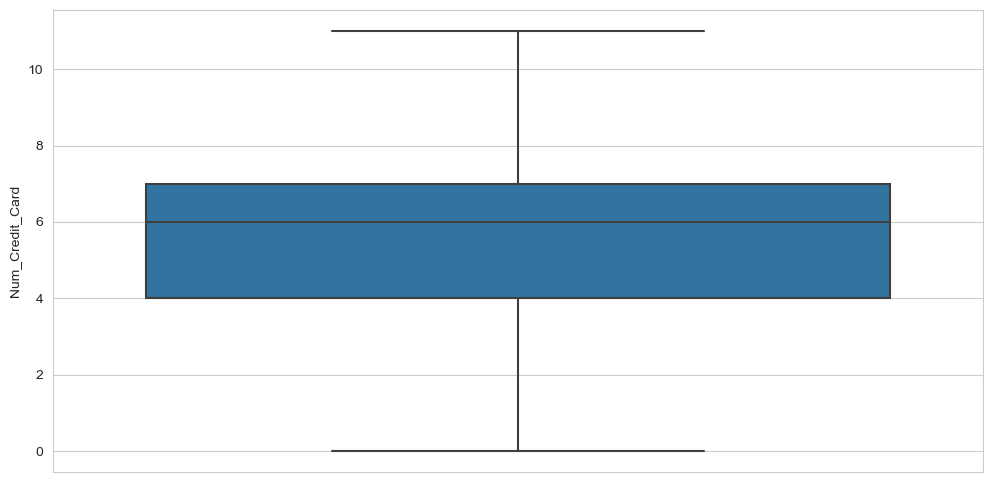

In [730]:
sns.boxplot(y='Num_Credit_Card', data=df);

### Interest_Rate

In [731]:
df.Interest_Rate

3           3
5           3
6           3
9           6
11          6
         ... 
99985      29
99986      29
99991      29
99997    5729
99999       7
Name: Interest_Rate, Length: 55630, dtype: int64

<Axes: ylabel='Interest_Rate'>

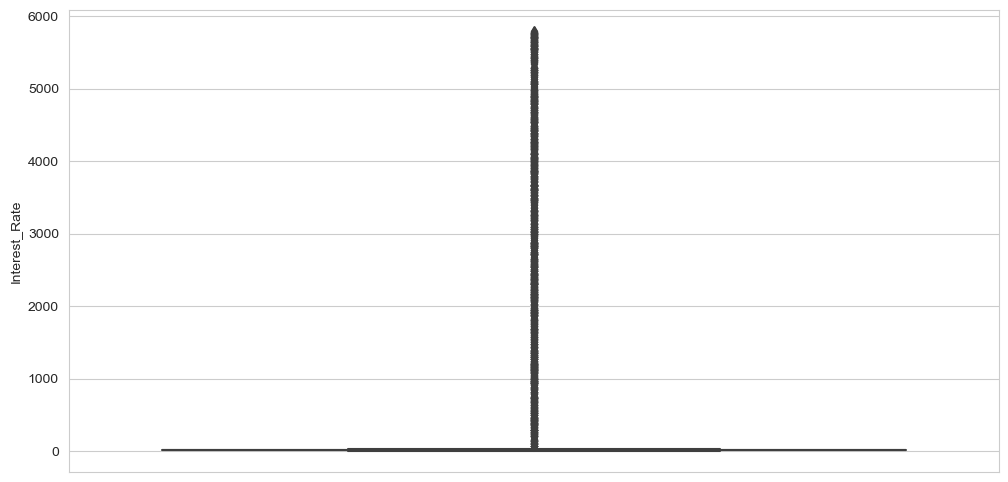

In [732]:
sns.boxplot(y='Interest_Rate', data=df)

In [733]:
Q1 = df['Interest_Rate'].quantile(0.25)
Q3 = df['Interest_Rate'].quantile(0.75)
IQR = Q3 - Q1

max_value_Rate = Q3 + 1.5 * IQR
max_value_Rate

38.0

In [734]:
df[df.Interest_Rate>max_value_Rate]

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
89      33      Engineer      88640.240                  3                6   
178     20  Entrepreneur     106733.130                  4                4   
229     40     Architect      28572.390                  6                3   
325     33  MediaManager      12909.895                  5                5   
344     21        Lawyer     148699.320                  3                4   
...    ...           ...            ...                ...              ...   
99791   54      Musician      99520.500                  3                1   
99801   16     Developer      14937.490                  8                8   
99882   31      Mechanic   16884797.000                  7                3   
99914   54  MediaManager      20059.980                  8                5   
99997   25      Mechanic      39628.990                  4                6   

       Interest_Rate Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
89               433           2                    4                      2   
178             4975           0                    2                      6   
229              668           3                   25                     11   
325              753           0                   17                     14   
344              748           3                   13                      8   
...              ...         ...                  ...                    ...   
99791           4396           3                    8                      5   
99801            387        -100                   42                     13   
99882           1947           0                    7                      8   
99914            360           4                   25                      9   
99997           5729           2                   27                      6   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
89                    3.000       Good           950.36   
178                   0.000       Good            76.23   
229                   2.000   Standard           400.07   
325                   1.000   Standard            602.5   
344                   1.000       Good           949.38   
...                     ...        ...              ...   
99791                 5.000       Good           547.21   
99801                 6.000        Bad          3699.44   
99882                 2.000   Standard            330.6   
99914                 3.000       Good           909.01   
99997                 3.000       Good           502.38   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
89                       41.036   25 Years and 6 Months                    NM   
178                      42.070  32 Years and 11 Months                    No   
229                      35.694   30 Years and 8 Months                   Yes   
325                      35.634   17 Years and 6 Months                    No   
344                      41.687   30 Years and 7 Months                    No   
...                         ...                     ...                   ...   
99791                    38.798   16 Years and 8 Months                    NM   
99801                    35.965   13 Years and 3 Months                   Yes   
99882                    38.524   23 Years and 0 Months                   Yes   
99914                    29.205   16 Years and 5 Months                    No   
99997                    41.256   31 Years and 8 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
89                 135.173        157.174788304235   
178                  0.000      172.03282853259896   
229                 69.603        129.264834657262   
325                  0.000      31.012826650846385   
344                364.915       296.1518279313217   
...                    ...                     ...   
99791              196.529      147.5

In [735]:
df.loc[df['Interest_Rate'] > max_value_Rate, "Interest_Rate"] = max_value_Rate 

<Axes: ylabel='Interest_Rate'>

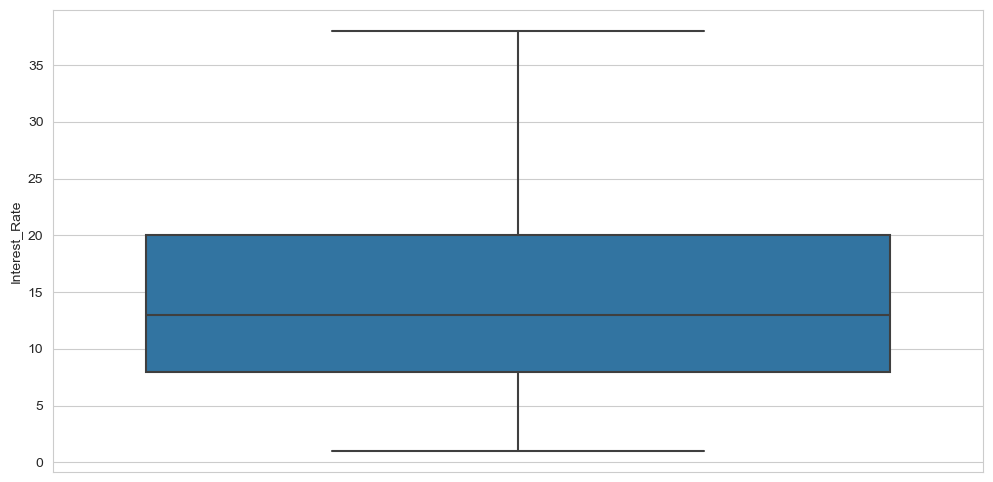

In [736]:
sns.boxplot(y='Interest_Rate', data=df)

### Num_of_Loan

In [737]:
df['Num_of_Loan'] = df['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)


<Axes: ylabel='Num_of_Loan'>

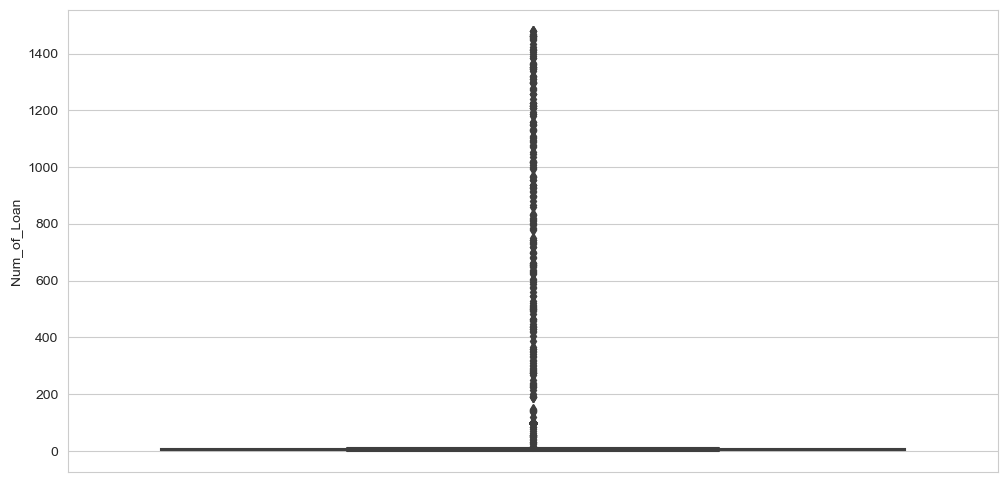

In [738]:
sns.boxplot(y='Num_of_Loan', data=df)

In [739]:
Q1 = df['Num_of_Loan'].quantile(0.25)
Q3 = df['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1

max_value_Loan = Q3 + 1.5 * IQR
max_value_Loan

12.0

In [740]:
df[df.Num_of_Loan>max_value_Loan]

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
21      34      Engineer     143162.640                  1                5   
31      55  Entrepreneur      30689.890                  2                5   
34      21     Developer      35547.710                  7                5   
39      21     Developer      35547.710                  7                5   
53      34        Lawyer     131313.400                  0                1   
...    ...           ...            ...                ...              ...   
99853   40     Scientist      81093.160                 10                7   
99859   43     Architect      10692.160                  8                4   
99902   34  Entrepreneur      41329.560                  2                3   
99919   54  MediaManager      20059.980                  8                5   
99969   45  MediaManager      16680.350                  1                1   

       Interest_Rate  Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
21                 8          967                    8                      6   
31                 4          100                    4                      9   
34                 5          100                    5                     12   
39                 5          100                    1                     15   
53                 8          100                    0                      3   
...              ...          ...                  ...                    ...   
99853             17          349                   29                     20   
99859             16          100                   17                      9   
99902              7          100                    2                      8   
99919             12          966                   25                     11   
99969              5          100                    3                      0   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
21                    3.000       Good          1303.01   
31                    4.000       Good           632.46   
34                    4.000   Standard           943.86   
39                    4.000   Standard           943.86   
53                    4.000       Good           352.16   
...                     ...        ...              ...   
99853                12.000        Bad           4523.3   
99859                 4.000   Standard          1350.85   
99902                 2.000       Good          1245.01   
99919                 8.000       Good           909.01   
99969                 4.000       Good           897.16   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
21                       39.784   18 Years and 2 Months                    No   
31                       27.333  17 Years and 10 Months                    No   
34                       23.462  30 Years and 10 Months                   Yes   
39                       25.863   31 Years and 3 Months                   Yes   
53                       41.980   31 Years and 0 Months                    No   
...                         ...                     ...                   ...   
99853                    35.926   9 Years and 10 Months                    NM   
99859                    31.461   31 Years and 8 Months                   Yes   
99902                    39.012   23 Years and 9 Months                    No   
99919                    32.474  16 Years and 10 Months                    No   
99969                    34.086   21 Years and 2 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
21                 246.992      257.80809942568976   
31                  16.415      125.61725053231268   
34                   0.000      173.13865100158367   
39                   0.000      181.33090096186916   
53                 911.220       86.56638801207531   
...                    ...                     ...   
99853              409.03

In [741]:
df.loc[df['Num_of_Loan'] > max_value_Loan, "Num_of_Loan"] = max_value_Loan 

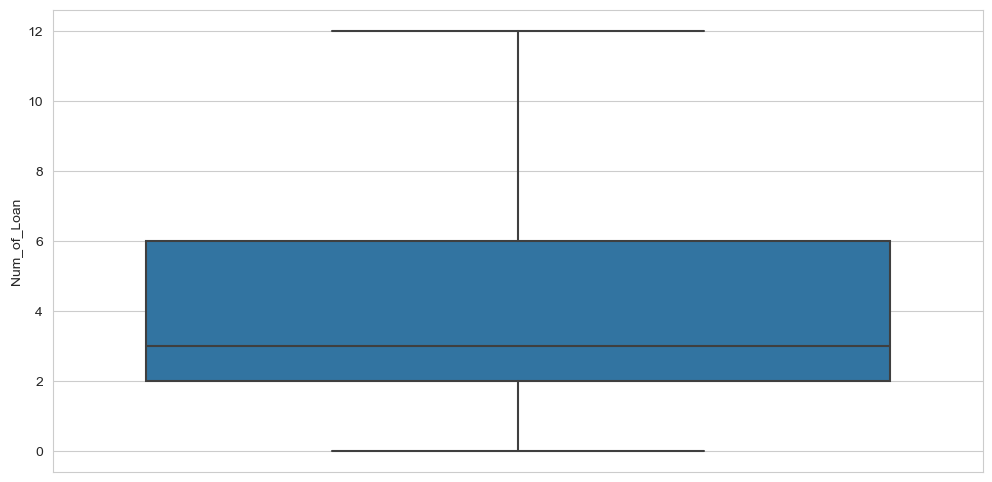

In [742]:
sns.boxplot(y='Num_of_Loan', data=df );

### Delay_from_due_date

In [743]:
df.Delay_from_due_date

3         5
5         8
6         3
9         7
11        3
         ..
99985    33
99986    33
99991    33
99997    27
99999    18
Name: Delay_from_due_date, Length: 55630, dtype: int64

In [744]:
df[df.Delay_from_due_date<0]

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
49      34        Lawyer     131313.400                  0                1   
74      44    Journalist      31370.800                  1                6   
78      45    Journalist      31370.800                  1                6   
88      32      Engineer      88640.240                  3                6   
700     28      Mechanic      15398.950                  1                7   
...    ...           ...            ...                ...              ...   
97928   23     Architect      21488.170                  4                4   
98442   50      Musician      19809.270                  5                5   
98446   50      Musician      19809.270                  5                5   
99368   31  MediaManager      61465.780                  2                3   
99667   31        Lawyer     146310.680                  5                4   

       Interest_Rate  Num_of_Loan  Delay_from_due_date Num_of_Delayed_Payment  \
49                 8            2                   -1                      2   
74                12            2                   -2                      0   
78                12           12                   -1                      2   
88                 1            2                   -1                      0   
700                5            4                   -1                      0   
...              ...          ...                  ...                    ...   
97928              7            3                   -2                     10   
98442              8            1                   -1                      0   
98446              8            1                   -2                      0   
99368             11           12                   -4                     10   
99667              9            1                   -2                      7   

       Num_Credit_Inquiries Credit_Mix Outstanding_Debt  \
49                    4.000       Good           352.16   
74                    5.000       Good           421.43   
78                    5.000       Good           421.43   
88                    3.000       Good           950.36   
700                   8.000       Good           343.84   
...                     ...        ...              ...   
97928                 1.000       Good           553.06   
98442                 2.000       Good           562.34   
98446                 2.000       Good           562.34   
99368                 0.000       Good           608.87   
99667                 1.000       Good           928.28   

       Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
49                       31.984   30 Years and 8 Months                    No   
74                       31.046   26 Years and 7 Months                    No   
78                       22.762  26 Years and 11 Months                    No   
88                       28.211   25 Years and 5 Months                    No   
700                      30.973   28 Years and 7 Months                    NM   
...                         ...                     ...                   ...   
97928                    39.189   17 Years and 8 Months                    No   
98442                    36.534  29 Years and 11 Months                    No   
98446                    39.023   30 Years and 3 Months                    No   
99368                    26.846  17 Years and 10 Months                    No   
99667                    35.389   22 Years and 4 Months                    No   

       Total_EMI_per_month Amount_invested_monthly  \
49                 137.645       698.8732707169384   
74                  46.616       140.8206959818371   
78                  46.616       188.3949004901688   
88                 135.173       98.93176402067013   
700                 34.814        123.416843254174   
...                    ...                     ...   
97928               42.43

In [745]:
df = df[df.Delay_from_due_date >=0]

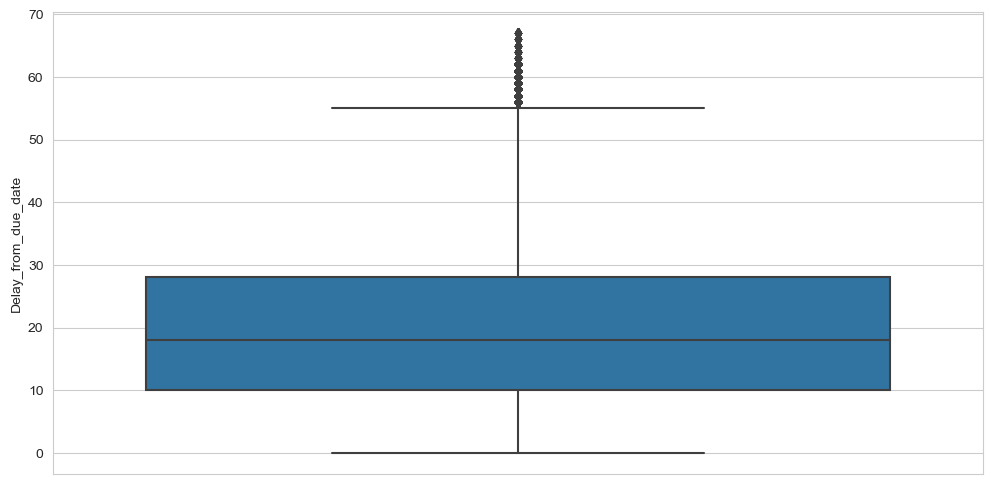

In [746]:
sns.boxplot(y='Delay_from_due_date', data=df);

### Num_of_Delayed_Payment

In [747]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

<Axes: ylabel='Num_of_Delayed_Payment'>

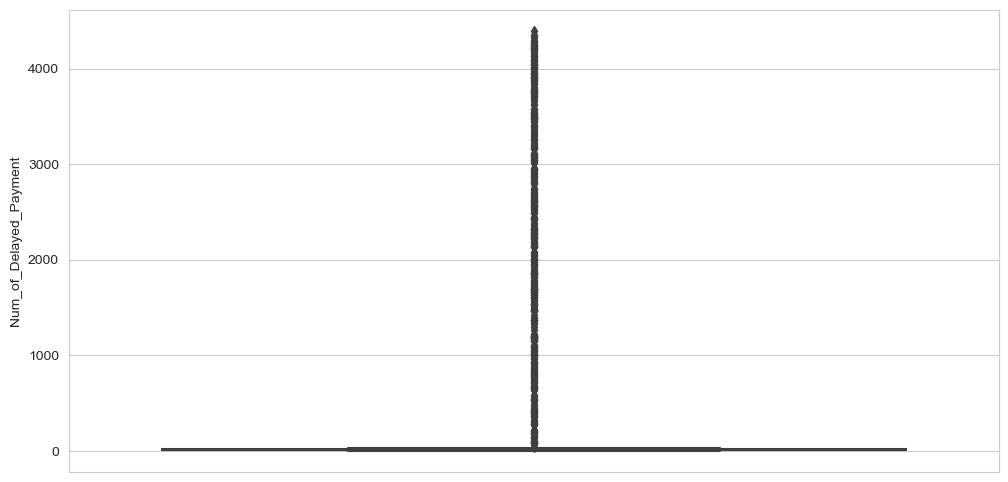

In [748]:
sns.boxplot(y='Num_of_Delayed_Payment', data=df)

In [749]:
Q1 = df['Num_of_Delayed_Payment'].quantile(0.25)
Q3 = df['Num_of_Delayed_Payment'].quantile(0.75)
IQR = Q3 - Q1

max_value_Num_of_Delayed_Payment = Q3 + 1.5 * IQR
max_value_Num_of_Delayed_Payment

31.5

In [750]:
df[df.Num_of_Delayed_Payment>max_value_Num_of_Delayed_Payment]

Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
252     43    Musician      18627.640                  7                7   
284     36     Manager      71681.400                  3                6   
304     36    Musician      15566.020                  8                5   
643     47  Accountant      17787.340                  8                4   
706     18   Developer      27070.070                  7                3   
...    ...         ...            ...                ...              ...   
99133   31      Lawyer      77633.040                  7                5   
99402   27    Mechanic       8968.555                 10                8   
99562   28      Lawyer      21471.580                  7                3   
99563   28      Lawyer      21471.580                  7                3   
99825   44      Doctor      32625.590                  0                5   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
252               19            6                   31   
284               15            1                    8   
304               32            4                   16   
643               16            2                    6   
706               11            4                   17   
...              ...          ...                  ...   
99133             34            5                   55   
99402             30            8                   58   
99562             16            2                   14   
99563             16            2                   15   
99825              8            4                    5   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
252                      3318                 7.000        Bad   
284                      3083                 0.000   Standard   
304                      1338                 7.000   Standard   
643                       183                 0.000   Standard   
706                      1106                 6.000   Standard   
...                       ...                   ...        ...   
99133                    3336                 8.000        Bad   
99402                    3392                12.000        Bad   
99562                    3688                 4.000   Standard   
99563                     221                 4.000   Standard   
99825                    2047                 3.000       Good   

      Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
252            1793.54                    25.585   19 Years and 1 Months   
284            1293.02                    40.791  25 Years and 11 Months   
304            1693.95                    37.410   7 Years and 10 Months   
643              730.9                    34.903   30 Years and 0 Months   
706             919.76                    29.831   29 Years and 4 Months   
...                ...                       ...                     ...   
99133          3392.65                    32.025    0 Years and 9 Months   
99402          2502.86                    38.044   11 Years and 5 Months   
99562            68.06                    40.940   23 Years and 9 Months   
99563            68.06                    31.039  23 Years and 10 Months   
99825            177.9                    33.862   28 Years and 9 Months   

      Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
252                     Yes               65.139       24.34618840548105   
284                     Yes               53.924                   10000   
304                     Yes               43.071        65.9865855206332   
643                      NM               20.064      28.516043623264604   
706                      No               73.233      104.18110390526935   
...                     ...                  ...                     ...   
99133                   Yes              227.777       106.0151257315186   
99402                   Yes               57.079       93.6478869122859

In [751]:
df.loc[df['Num_of_Delayed_Payment'] > max_value_Num_of_Delayed_Payment, "Num_of_Delayed_Payment"] = max_value_Num_of_Delayed_Payment 

<Axes: ylabel='Num_of_Delayed_Payment'>

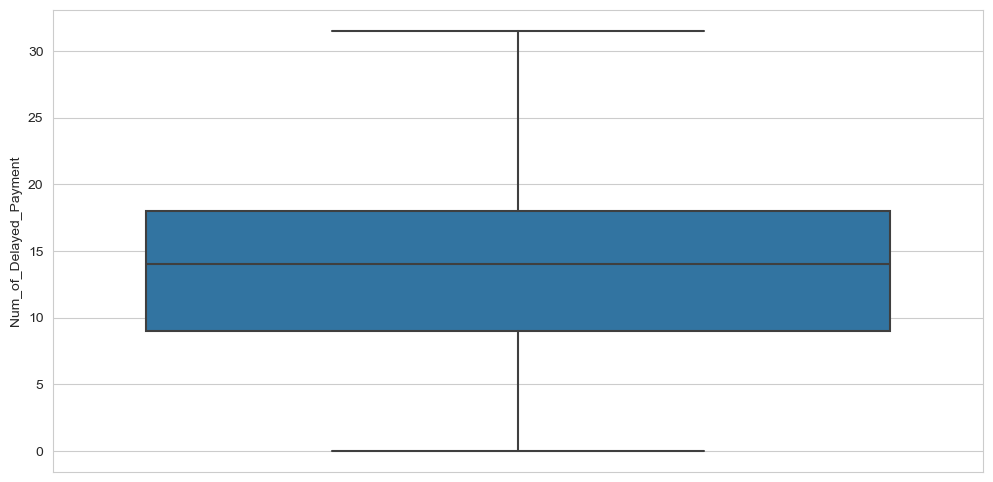

In [752]:
sns.boxplot(y='Num_of_Delayed_Payment', data=df)

### Num_Credit_Inquiries

In [753]:
df.Num_Credit_Inquiries

3       4.000
5       4.000
6       4.000
9       2.000
11      2.000
         ... 
99985   9.000
99986   9.000
99991   9.000
99997   3.000
99999   3.000
Name: Num_Credit_Inquiries, Length: 55314, dtype: float64

In [754]:
df.Num_Credit_Inquiries.value_counts()

Num_Credit_Inquiries
4.000       6418
3.000       4914
6.000       4582
7.000       4578
2.000       4513
            ... 
727.000        1
384.000        1
1425.000       1
562.000        1
2448.000       1
Name: count, Length: 771, dtype: int64

<Axes: ylabel='Num_Credit_Inquiries'>

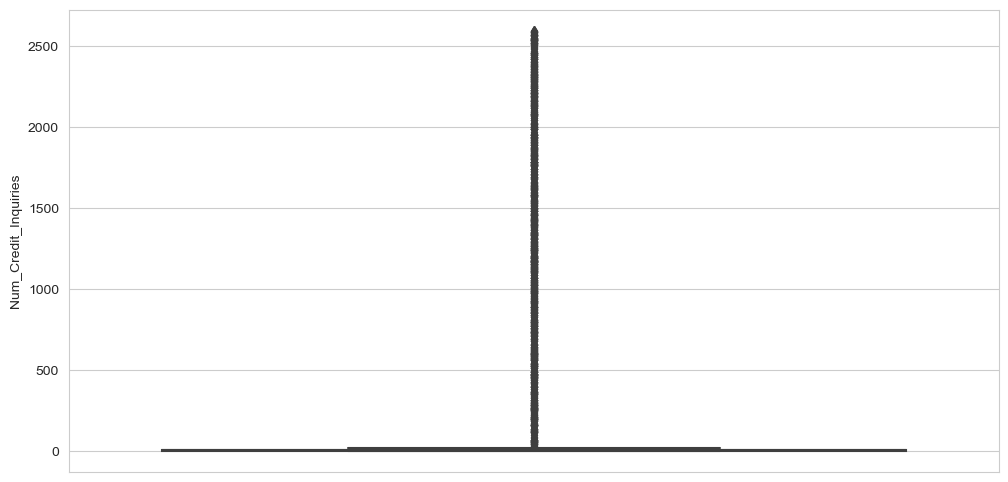

In [755]:
sns.boxplot(y='Num_Credit_Inquiries', data=df)

In [756]:
Q1 = df['Num_Credit_Inquiries'].quantile(0.25)
Q3 = df['Num_Credit_Inquiries'].quantile(0.75)
IQR = Q3 - Q1

max_value_Num_Credit_Inquiries = Q3 + 1.5 * IQR
max_value_Num_Credit_Inquiries

18.0

In [757]:
df = df[df['Num_Credit_Inquiries'] <= max_value_Num_Credit_Inquiries]

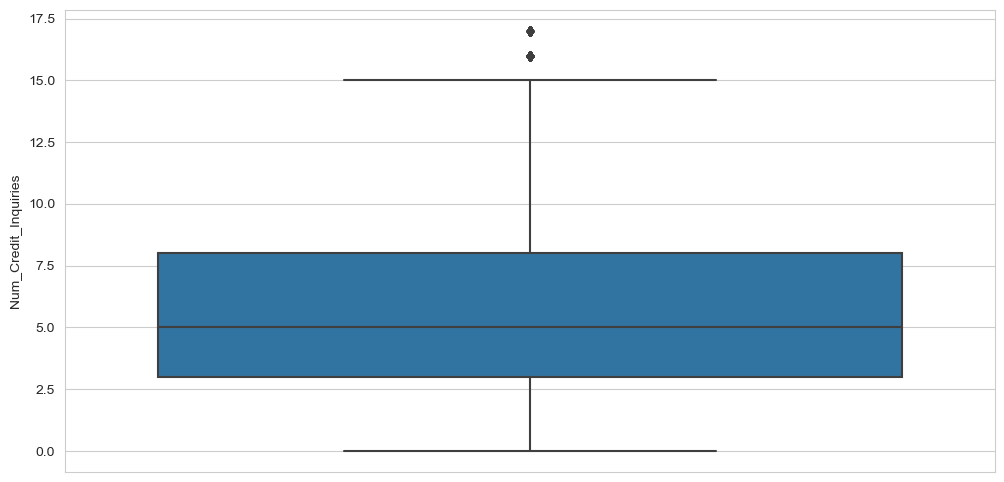

In [758]:
sns.boxplot(y='Num_Credit_Inquiries', data=df);

In [759]:
df.loc[df['Num_Credit_Inquiries'] > 15, "Num_Credit_Inquiries"] = 15

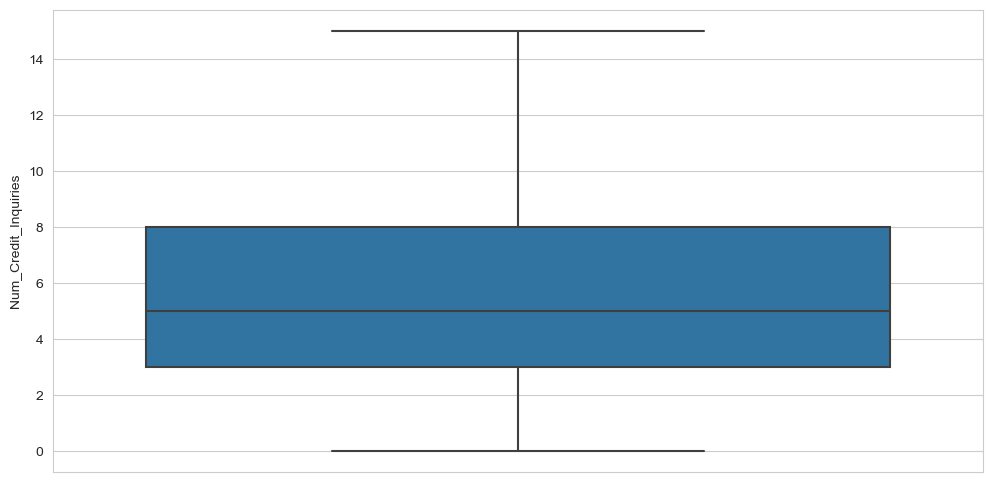

In [760]:
sns.boxplot(y='Num_Credit_Inquiries', data=df);

### Credit_Mix

In [761]:
df.Credit_Mix

3        Good
5        Good
6        Good
9        Good
11       Good
         ... 
99985     Bad
99986     Bad
99991     Bad
99997    Good
99999    Good
Name: Credit_Mix, Length: 54414, dtype: object

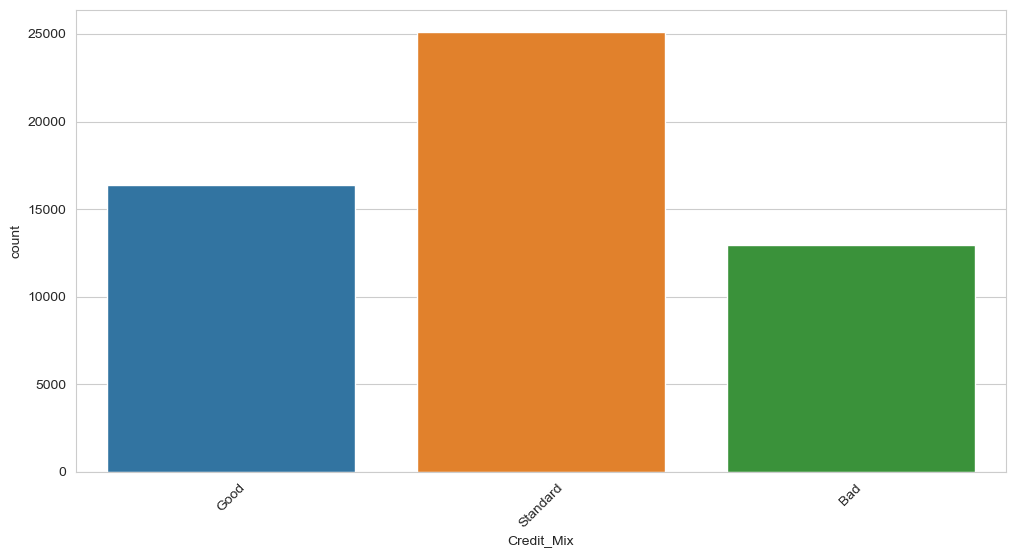

In [762]:
sns.countplot(data = df ,x ='Credit_Mix')
plt.xticks(rotation=45)
plt.show()

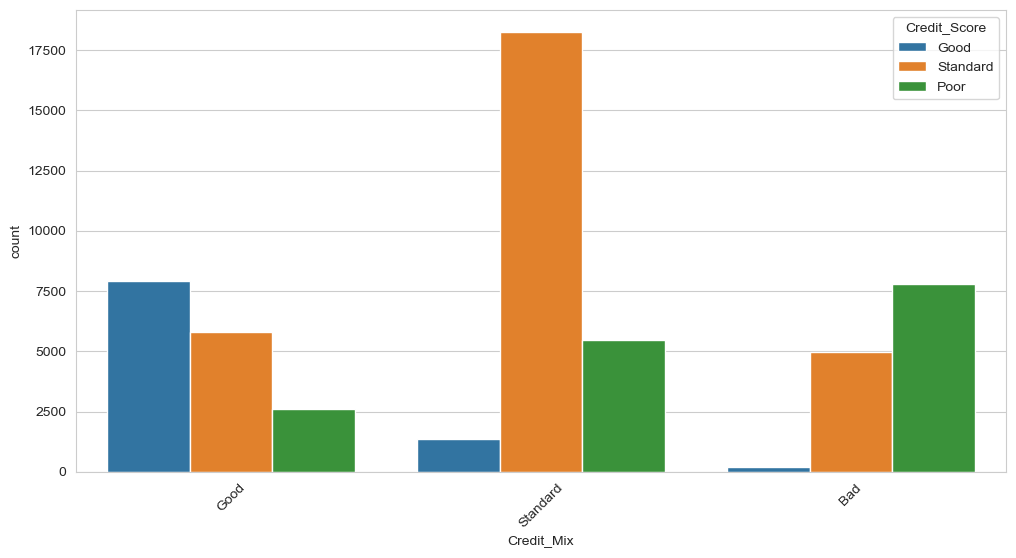

In [763]:
sns.countplot(data = df ,x ='Credit_Mix', hue="Credit_Score")
plt.xticks(rotation=45)
plt.show()

### Outstanding_Debt

In [764]:
df.Outstanding_Debt

3        809.98
5        809.98
6        809.98
9        605.03
11       605.03
          ...  
99985    3571.7
99986    3571.7
99991    3571.7
99997    502.38
99999    502.38
Name: Outstanding_Debt, Length: 54414, dtype: object

In [765]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(0)

<Axes: ylabel='Outstanding_Debt'>

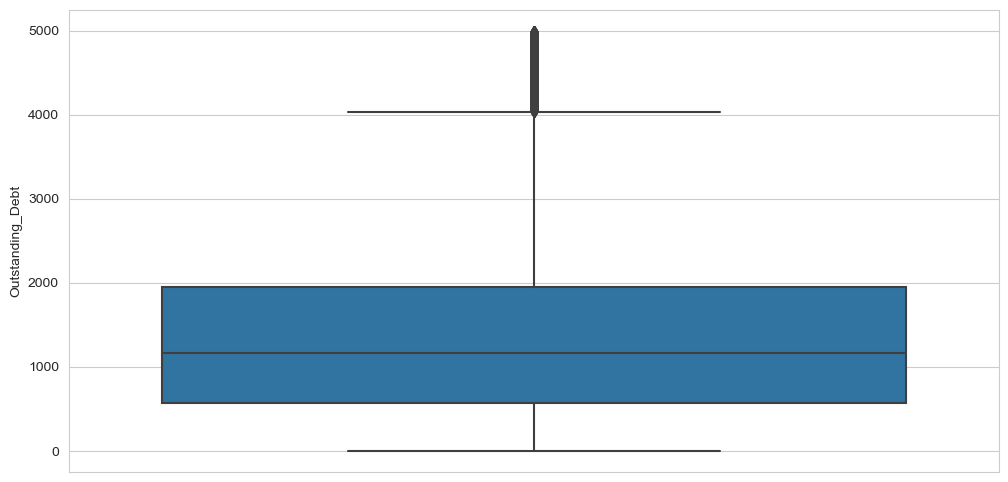

In [766]:
sns.boxplot(y='Outstanding_Debt', data=df)

In [767]:
df.Outstanding_Debt.sort_values()

96649      0.230
96651      0.230
96652      0.230
96653      0.230
94775      0.340
          ...   
45173   4997.100
8736    4998.070
8737    4998.070
8738    4998.070
8743    4998.070
Name: Outstanding_Debt, Length: 54414, dtype: float64

In [768]:
df.Outstanding_Debt.value_counts()

Outstanding_Debt
1360.450    15
1109.030    14
288.920     13
100.300     13
2089.580    13
            ..
462.840      1
759.090      1
752.660      1
139.110      1
839.760      1
Name: count, Length: 12182, dtype: int64

In [769]:
df.Outstanding_Debt.median()

1169.13

In [770]:
df.loc[df.Outstanding_Debt > 4000, "Outstanding_Debt"] = 4000

<Axes: ylabel='Outstanding_Debt'>

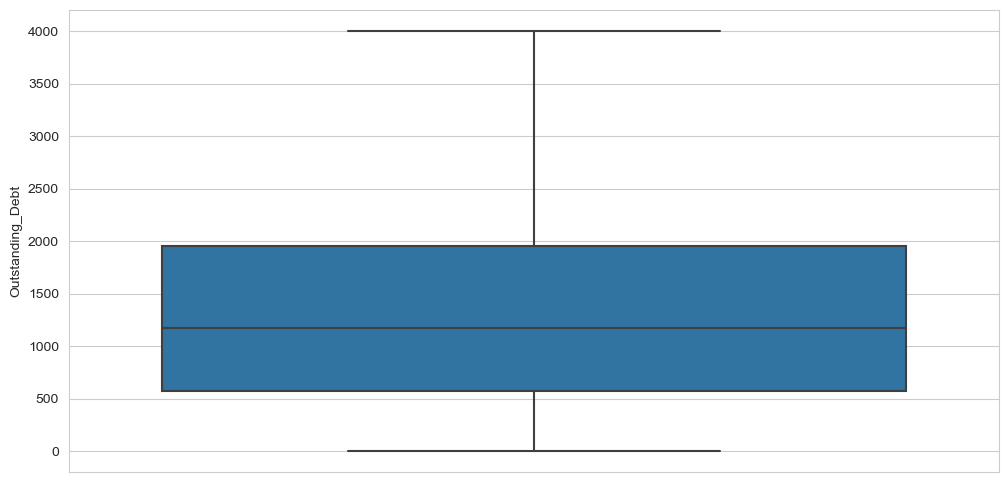

In [771]:
sns.boxplot(y='Outstanding_Debt', data=df)

### Credit_Utilization_Ratio

In [772]:
df.Credit_Utilization_Ratio

3       31.378
5       27.262
6       22.538
9       38.551
11      39.183
         ...  
99985   39.773
99986   24.714
99991   37.141
99997   41.256
99999   34.192
Name: Credit_Utilization_Ratio, Length: 54414, dtype: float64

In [773]:
df.Credit_Utilization_Ratio.value_counts()

Credit_Utilization_Ratio
31.378    1
24.754    1
31.541    1
28.945    1
26.393    1
         ..
28.676    1
34.979    1
40.478    1
35.466    1
34.192    1
Name: count, Length: 54414, dtype: int64

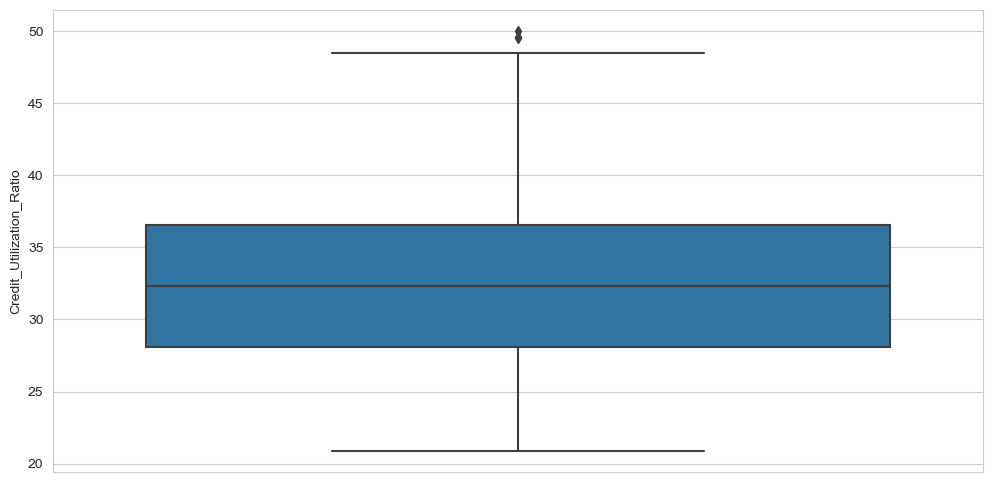

In [774]:
sns.boxplot(y='Credit_Utilization_Ratio', data=df);

### Payment_of_Min_Amount

In [775]:
df.Payment_of_Min_Amount

3         No
5         No
6         No
9         No
11        No
        ... 
99985    Yes
99986    Yes
99991    Yes
99997     No
99999     No
Name: Payment_of_Min_Amount, Length: 54414, dtype: object

In [776]:
df.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    28644
No     19258
NM      6512
Name: count, dtype: int64

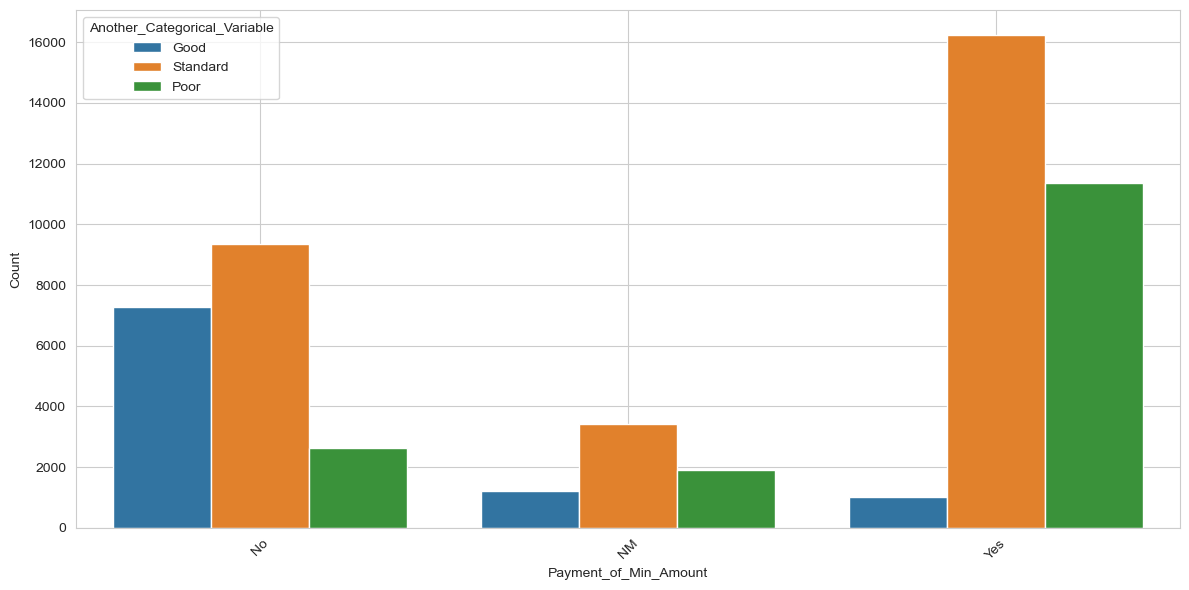

In [777]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=df)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

### Total_EMI_per_month

In [778]:
df.Total_EMI_per_month

3          49.575
5          49.575
6          49.575
9          18.816
11         18.816
           ...   
99985   12112.000
99986      60.965
99991      60.965
99997      35.104
99999      35.104
Name: Total_EMI_per_month, Length: 54414, dtype: float64

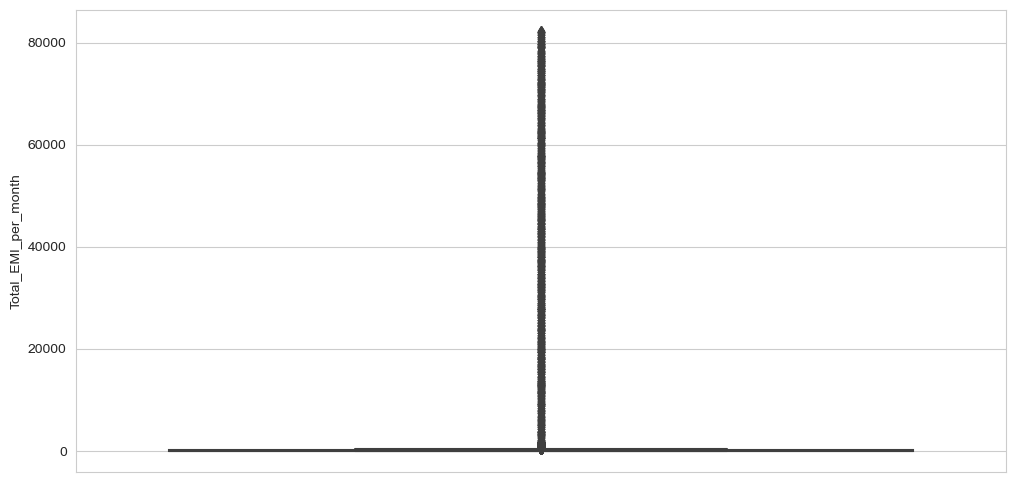

In [779]:
sns.boxplot(y='Total_EMI_per_month', data=df);

In [780]:
Q1 = df['Total_EMI_per_month'].quantile(0.25)
Q3 = df['Total_EMI_per_month'].quantile(0.75)
IQR = Q3 - Q1

max_value_Total_EMI_per_month = Q3 + 1.5 * IQR
max_value_Total_EMI_per_month

347.34887898274656

In [781]:
df[df.Total_EMI_per_month>max_value_Total_EMI_per_month]

Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
50      34     Lawyer     131313.400                  0                1   
51      34     Lawyer     131313.400                  0                1   
52      34     Lawyer     131313.400                  0                1   
53      34     Lawyer     131313.400                  0                1   
54      34     Lawyer   10909427.000                  0                1   
...    ...        ...            ...                ...              ...   
99955   21  Architect      38321.390                  4                4   
99957   21  Architect      38321.390                  4                4   
99958   21  Architect      38321.390                  4                4   
99960   18     Lawyer      42903.790                  0                4   
99985   28  Architect      20002.880                 10                8   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
50                 8            2                    0   
51                 8            2                    0   
52                 8            2                    0   
53                 8           12                    0   
54                 8            2                    0   
...              ...          ...                  ...   
99955              3            4                   11   
99957              3            4                   11   
99958              3            4                   11   
99960              6            1                   14   
99985             29            5                   33   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
50                      3.000                 4.000       Good   
51                      2.000                 4.000       Good   
52                      4.000                 4.000       Good   
53                      3.000                 4.000       Good   
54                      2.000                 4.000       Good   
...                       ...                   ...        ...   
99955                   7.000                 3.000       Good   
99957                   7.000                 3.000       Good   
99958                  10.000                 3.000       Good   
99960                   0.000                 1.000       Good   
99985                  25.000                 9.000        Bad   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
50              352.160                    31.803   30 Years and 9 Months   
51              352.160                    42.646  30 Years and 10 Months   
52              352.160                    40.903  30 Years and 11 Months   
53              352.160                    41.980   31 Years and 0 Months   
54              352.160                    26.948   31 Years and 1 Months   
...                 ...                       ...                     ...   
99955           678.570                    35.455   17 Years and 2 Months   
99957           678.570                    37.367   17 Years and 4 Months   
99958           678.570                    28.360   17 Years and 5 Months   
99960          1079.480                    27.289   28 Years and 1 Months   
99985          3571.700                    39.773    5 Years and 9 Months   

      Payment_of_Min_Amount  Total_EMI_per_month Amount_invested_monthly  \
50                       NM              911.220      188.06432109973838   
51                       No            23834.000      337.43495631738324   
52                       No            32662.000       263.3789089320552   
53                       No              911.220       86.56638801207531   
54                       No              911.220       930.3918977796665   
...                     ...                  ...                     ...   
99955                    No              362.072      293.71319332766717   
99957                    No              362.072       26.7016796952381

In [782]:
df.loc[df['Total_EMI_per_month'] > max_value_Total_EMI_per_month, "Total_EMI_per_month"] = max_value_Total_EMI_per_month 

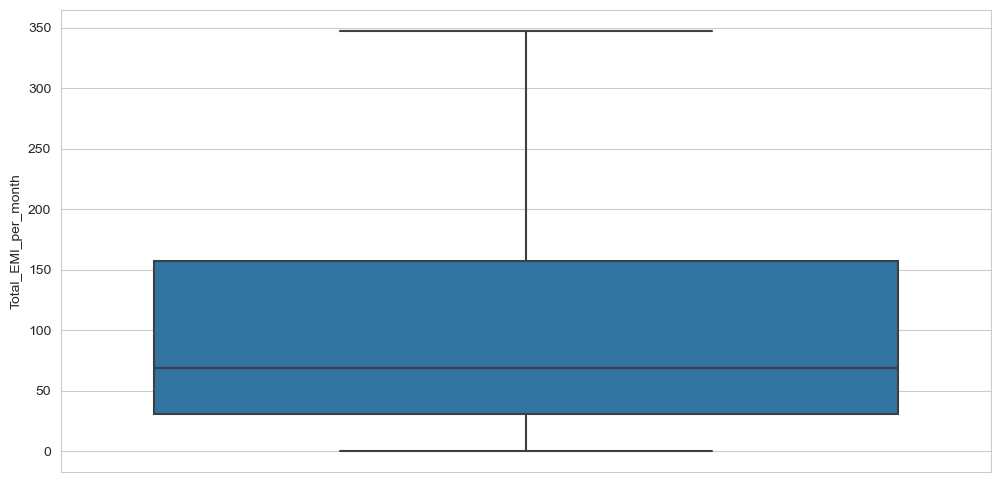

In [783]:
sns.boxplot(y='Total_EMI_per_month', data=df );

### Amount_invested_monthly

In [784]:
df.Amount_invested_monthly

3         199.4580743910713
5        62.430172331195294
6         178.3440674122349
9         40.39123782853101
11        99.30622796053305
                ...        
99985     148.2752327451465
99986     76.28279349064607
99991     34.66290609052614
99997     24.02847744864441
99999     167.1638651610451
Name: Amount_invested_monthly, Length: 54414, dtype: object

In [785]:
# Same but handling more errors

df['Amount_invested_monthly'] = df['Amount_invested_monthly'].replace('', '0')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(0)

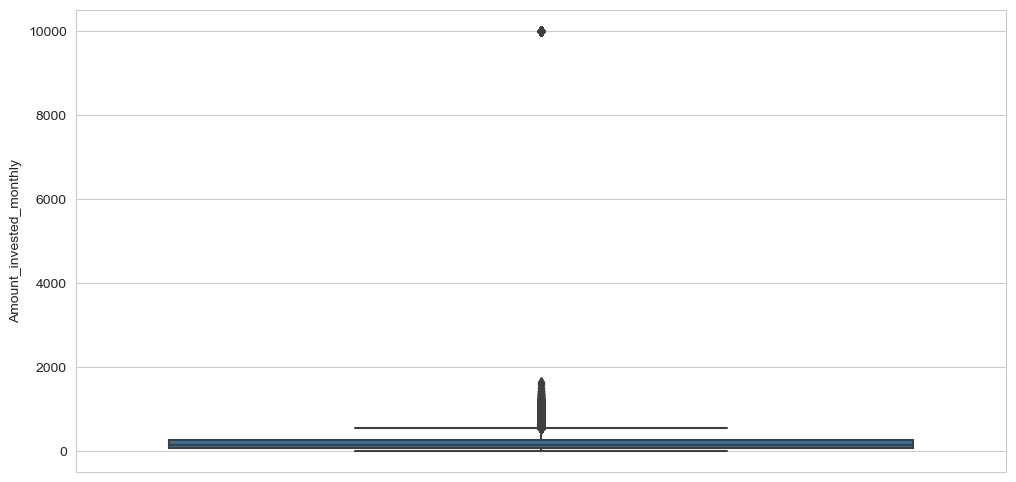

In [786]:
sns.boxplot(y='Amount_invested_monthly', data=df);

In [787]:
df.Amount_invested_monthly.value_counts()

Amount_invested_monthly
10000.000    2433
0.000          98
199.458         1
46.516          1
252.361         1
             ... 
717.770         1
373.206         1
458.552         1
908.694         1
167.164         1
Name: count, Length: 51885, dtype: int64

In [788]:
df.Amount_invested_monthly.sort_values()

33245       0.000
53939       0.000
94531       0.000
3181        0.000
46167       0.000
           ...   
44235   10000.000
39373   10000.000
54601   10000.000
69381   10000.000
64646   10000.000
Name: Amount_invested_monthly, Length: 54414, dtype: float64

In [789]:
df.Amount_invested_monthly.median()

134.47903987985066

In [790]:
df[df.Amount_invested_monthly >9000]

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
23      34      Engineer     143162.640                  1                5   
28      55  Entrepreneur      30689.890                  2                5   
121     30     Scientist      31993.780                  6                6   
200     48  Entrepreneur      20787.690                  8                6   
284     36       Manager      71681.400                  3                6   
...    ...           ...            ...                ...              ...   
99860   43     Architect      10692.160                  8                4   
99879   27     Scientist     118677.540                  4                4   
99882   31      Mechanic   16884797.000                  7                3   
99919   54  MediaManager      20059.980                  8                5   
99951   33  MediaManager      59146.360                  3                6   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
23                 8            3                    8   
28                 4            1                    5   
121                7            2                   12   
200               14            3                   22   
284               15            1                    8   
...              ...          ...                  ...   
99860             16            0                   17   
99879              6            4                    3   
99882             38            0                    7   
99919             12           12                   25   
99951              6            1                    8   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
23                      6.000                 3.000       Good   
28                      6.000                 4.000       Good   
121                    14.000                 0.000   Standard   
200                    14.000                 3.000   Standard   
284                    31.500                 0.000   Standard   
...                       ...                   ...        ...   
99860                  12.000                 4.000   Standard   
99879                  11.000                 5.000       Good   
99882                   8.000                 2.000   Standard   
99919                  11.000                 8.000       Good   
99951                   6.000                 5.000       Good   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
23             1303.010                    38.375   18 Years and 4 Months   
28              632.460                    41.154   17 Years and 7 Months   
121             818.220                    37.959  16 Years and 11 Months   
200             614.600                    23.723  17 Years and 10 Months   
284            1293.020                    40.791  25 Years and 11 Months   
...                 ...                       ...                     ...   
99860          1350.850                    27.944   31 Years and 9 Months   
99879           995.470                    39.747   30 Years and 6 Months   
99882           330.600                    38.524   23 Years and 0 Months   
99919           909.010                    32.474  16 Years and 10 Months   
99951           418.030                    27.682   20 Years and 8 Months   

      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
23                       No              246.992                10000.000   
28                       No               16.415                10000.000   
121                     Yes               45.141                10000.000   
200                      No               42.222                10000.000   
284                     Yes               53.924                10000.000   
...                     ...                  ...                      ...   
99860                   Yes                0.000                10000.000   
99879                    No

interestingly, when Amount_invested_monthly = 10000 , there 2433 samples. So we cant drop these or change them with mean or median even if they are outliers.

### Payment_Behaviour

In [791]:
df.Payment_Behaviour

3         LowspentSmallvaluepayments
5                             !@9#%8
6         LowspentSmallvaluepayments
9        HighspentLargevaluepayments
11       LowspentMediumvaluepayments
                    ...             
99985     LowspentSmallvaluepayments
99986     LowspentSmallvaluepayments
99991    HighspentLargevaluepayments
99997    HighspentLargevaluepayments
99999                         !@9#%8
Name: Payment_Behaviour, Length: 54414, dtype: object

In [792]:
df = df[df['Payment_Behaviour'] != '!@9#%8']

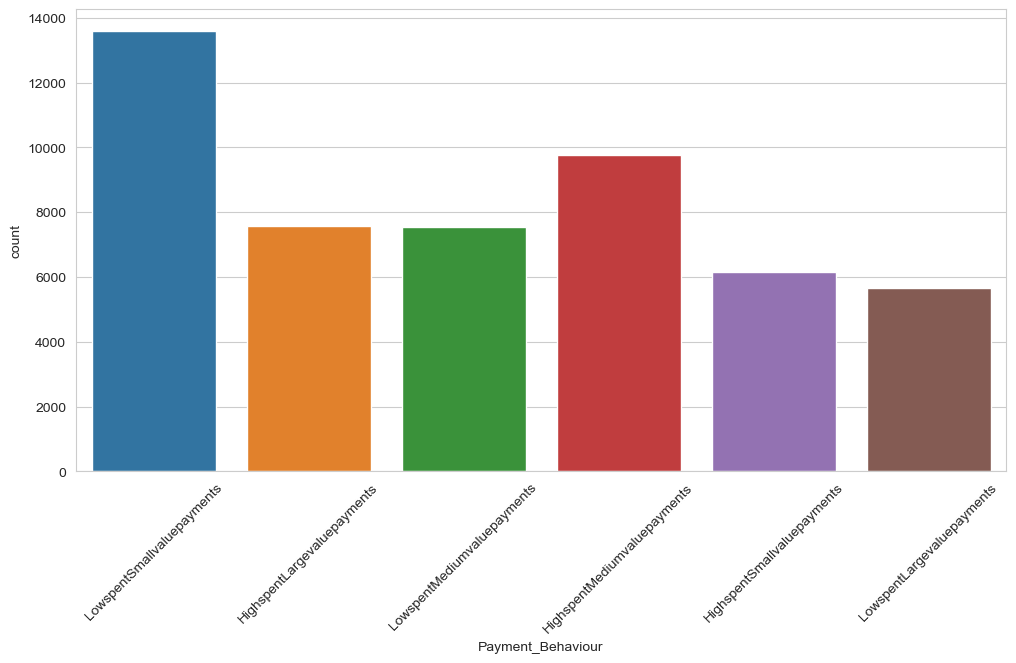

In [793]:
sns.countplot(data = df ,x ='Payment_Behaviour')
plt.xticks(rotation=45)
plt.show()

### Monthly Balance

In [794]:
df.Monthly_Balance

3        223.45130972736786
6         244.5653167062043
9         484.5912142650067
11        465.6762241330048
12        444.8670318506144
                ...        
99984               328.655
99985               273.751
99986               345.743
99991               337.363
99997               516.809
Name: Monthly_Balance, Length: 50330, dtype: object

In [795]:
df['Monthly_Balance'] = df['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(0)

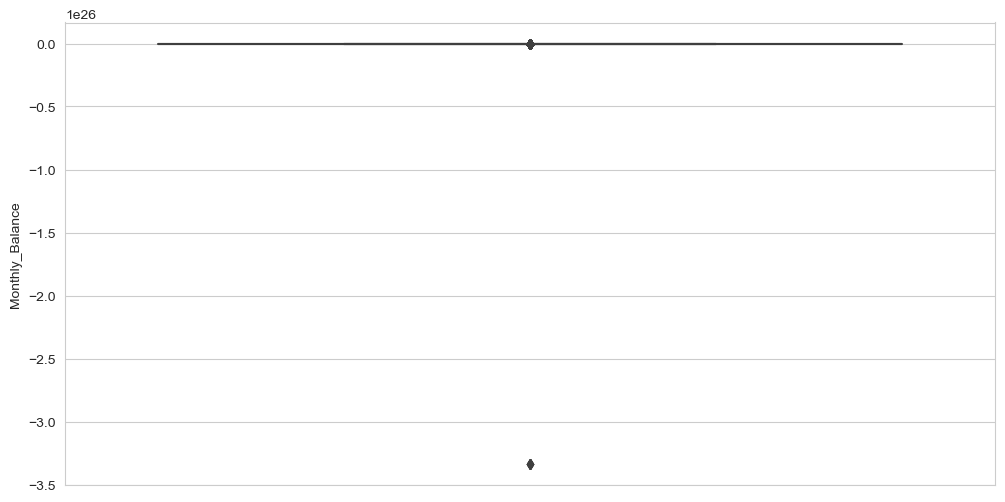

In [796]:
sns.boxplot(y='Monthly_Balance', data=df);

In [797]:
df.Monthly_Balance.value_counts()

Monthly_Balance
0.000                               809
-333333333333333314856026112.000      5
409.581                               1
768.089                               1
560.036                               1
                                   ... 
329.665                               1
297.996                               1
238.912                               1
342.027                               1
392.257                               1
Name: count, Length: 49518, dtype: int64

In [798]:
df[df.Monthly_Balance <0]

Age  Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
5545    17   Developer      41086.400                  3                4   
26177   45    Engineer      29728.310                  3                4   
29158   55      Lawyer      30748.930                  1                6   
75251   29    Mechanic      60904.590                  3                4   
82918   44  Journalist      61990.520                 10               10   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
5545               6            7                   10   
26177              6            2                   15   
29158             12            2                   10   
75251             12            2                   22   
82918             25            9                   18   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
5545                   17.000                10.000   Standard   
26177                   0.000                 3.000       Good   
29158                   3.000                 9.000       Good   
75251                  14.000                 8.000   Standard   
82918                  23.000                 9.000        Bad   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
5545            113.980                    34.827   11 Years and 6 Months   
26177           917.000                    38.198   31 Years and 9 Months   
29158           860.970                    40.634   19 Years and 5 Months   
75251          2441.470                    29.879  12 Years and 11 Months   
82918          3618.910                    37.719   13 Years and 8 Months   

      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
5545                    Yes              145.544                  201.143   
26177                    No               34.496                  198.612   
29158                    No               43.728                   79.072   
75251                   Yes               61.525                  394.894   
82918                    NM              347.349                  194.283   

                 Payment_Behaviour                  Monthly_Balance  \
5545   LowspentMediumvaluepayments -333333333333333314856026112.000   
26177   LowspentLargevaluepayments -333333333333333314856026112.000   
29158  HighspentSmallvaluepayments -333333333333333314856026112.000   
75251   LowspentSmallvaluepayments -333333333333333314856026112.000   
82918   LowspentSmallvaluepayments -333333333333333314856026112.000   

      Credit_Score  
5545      Standard  
26177         Good  
29158     Standard  
75251     Standard  
82918     Standard

In [799]:
df.loc[df.Monthly_Balance<0, "Monthly_Balance"] = 0

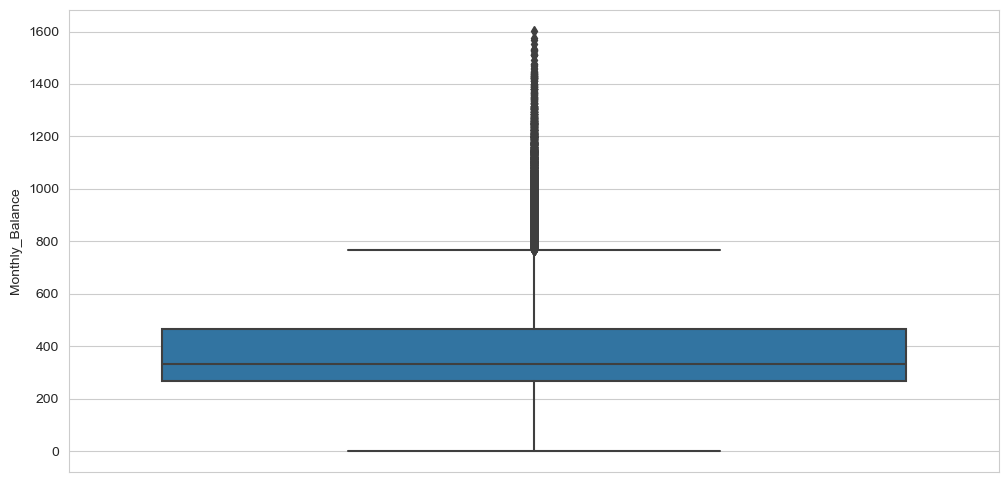

In [800]:
sns.boxplot(y='Monthly_Balance', data=df);

In [801]:
df[df.Monthly_Balance >800]

Age Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
17      34   Engineer     143162.640                  1                5   
21      34   Engineer     143162.640                  1                5   
22      34   Engineer     143162.640                  1                5   
23      34   Engineer     143162.640                  1                5   
48      33     Lawyer     131313.400                  0                1   
...    ...        ...            ...                ...              ...   
98259   32  Architect     175572.440                  5                4   
98262   32  Architect     175572.440                  5                4   
98263   32  Architect     175572.440                  5                4   
98265   39  Scientist     120009.320                  5                1   
98271   40  Scientist     120009.320                  5                1   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
17                 8            3                   13   
21                 8           12                    8   
22                 8            3                    8   
23                 8            3                    8   
48                 8            2                    0   
...              ...          ...                  ...   
98259              1            3                   10   
98262              1            3                   10   
98263              1            3                   10   
98265              7            4                   14   
98271              7            4                   14   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
17                      6.000                 3.000       Good   
21                      6.000                 3.000       Good   
22                      6.000                 3.000       Good   
23                      6.000                 3.000       Good   
48                      3.000                 2.000       Good   
...                       ...                   ...        ...   
98259                   2.000                 0.000       Good   
98262                   3.000                 0.000       Good   
98263                   2.000                 1.000       Good   
98265                   1.000                 0.000       Good   
98271                   1.000                 0.000       Good   

       Outstanding_Debt  Credit_Utilization_Ratio      Credit_History_Age  \
17             1303.010                    41.703  17 Years and 10 Months   
21             1303.010                    39.784   18 Years and 2 Months   
22             1303.010                    38.069   18 Years and 3 Months   
23             1303.010                    38.375   18 Years and 4 Months   
48              352.160                    32.201   30 Years and 7 Months   
...                 ...                       ...                     ...   
98259           388.990                    36.593   32 Years and 6 Months   
98262           388.990                    27.188   32 Years and 9 Months   
98263           388.990                    43.306  32 Years and 10 Months   
98265           446.510                    31.603   28 Years and 9 Months   
98271           446.510                    36.840   29 Years and 3 Months   

      Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
17                       No              246.992                  232.860   
21                       No              246.992                  257.808   
22                       No              246.992                  263.174   
23                       No              246.992                10000.000   
48                       NM              137.645                  378.171   
...                     ...                  ...                      ...   
98259                    No              290.107                  121.241   
98262                    No              290.107               

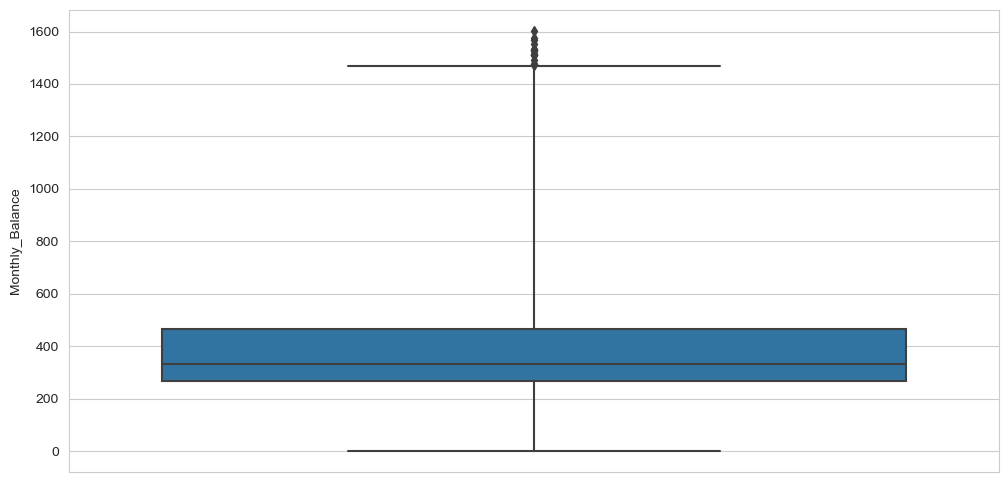

In [802]:
sns.boxplot(y='Monthly_Balance', data=df, whis=5);

iqr = 5 alındı.

In [803]:
df[df.Monthly_Balance >1450]

Age    Occupation  Annual_Income  Num_Bank_Accounts  Num_Credit_Card  \
2934    36    Accountant     174304.040                  1                3   
5289    20      Mechanic     173968.960                  4                7   
7475    33    Accountant     177887.800                  4                3   
9376    29        Lawyer     177907.720                  0                6   
9377    29        Lawyer     177907.720                  0                6   
9382    30        Lawyer     177907.720                  0                6   
16182   51      Engineer     172413.640                  2                3   
17029   55        Writer     178793.920                  1                1   
26869   39       Manager     171873.320                  3                5   
27968   30     Architect     176572.120                  3                7   
33945   32    Journalist     176044.040                  3                6   
50436   29     Developer     179193.760                  5                3   
62310   28      Engineer     177947.280                  2                7   
62956   55       Teacher     177846.680                  4                6   
62959   55       Teacher     177846.680                  4                6   
68000   19    Accountant     177696.920                  5                5   
84709   36    Journalist     168491.440                  4                4   
88085   31       Manager     177560.680                  0                3   
93540   51  MediaManager     174921.920                  2                4   
96435   45     Architect     171613.600                  5                3   

       Interest_Rate  Num_of_Loan  Delay_from_due_date  \
2934              12            0                    5   
5289               1            1                    7   
7475               3            0                    2   
9376               6            0                    8   
9377               6            0                    8   
9382               6            0                    8   
16182              2            0                   12   
17029             11            0                   14   
26869             11            0                    6   
27968             10            1                    7   
33945              6            1                   12   
50436              8            1                    1   
62310              2            0                   12   
62956             12            0                    6   
62959             12            0                    6   
68000              9            1                   13   
84709             12            0                    7   
88085              5            0                   22   
93540             12            0                    2   
96435              5            0                   12   

       Num_of_Delayed_Payment  Num_Credit_Inquiries Credit_Mix  \
2934                    7.000                 4.000       Good   
5289                    4.000                 3.000       Good   
7475                    9.000                 2.000       Good   
9376                    8.000                 0.000       Good   
9377                    8.000                 0.000       Good   
9382                    8.000                 0.000       Good   
16182                   9.000                 6.000       Good   
17029                   5.000                 7.000       Good   
26869                   2.000                 2.000       Good   
27968                   8.000                 1.000       Good   
33945                  11.000                 0.000       Good   
50436                   5.000                 3.000       Good   
62310                   2.000                 3.000       Good   
62956                   2.000                 5.000       Good   
62959                   2.000                 5.000       Good   
68000                   9.000                 3.000       Good   
84709 

In [804]:
df.loc[df.Monthly_Balance>1450, "Monthly_Balance"] =1450

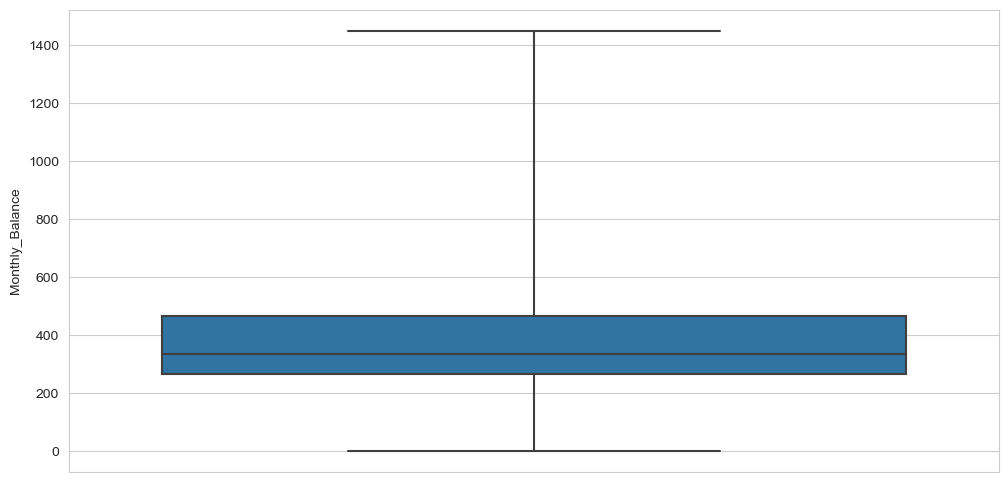

In [805]:
sns.boxplot(y='Monthly_Balance', data=df, whis=5);

### Credit History Age

In [806]:
df.Credit_History_Age

3         22 Years and 4 Months
6         22 Years and 7 Months
9         26 Years and 8 Months
11       26 Years and 10 Months
12       26 Years and 11 Months
                  ...          
99984      5 Years and 8 Months
99985      5 Years and 9 Months
99986     5 Years and 10 Months
99991      6 Years and 3 Months
99997     31 Years and 8 Months
Name: Credit_History_Age, Length: 50330, dtype: object

In [807]:
# Convert Credit History Age into Months for better model construction

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0 
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0' 
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0  

df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(parse_years_and_months)

In [808]:
df.Credit_History_Age_Months

3        268
6        271
9        320
11       322
12       323
        ... 
99984     68
99985     69
99986     70
99991     75
99997    380
Name: Credit_History_Age_Months, Length: 50330, dtype: int64

In [809]:
# dropping unnecessary Credit_History_Age
df = df.drop('Credit_History_Age', axis=1)

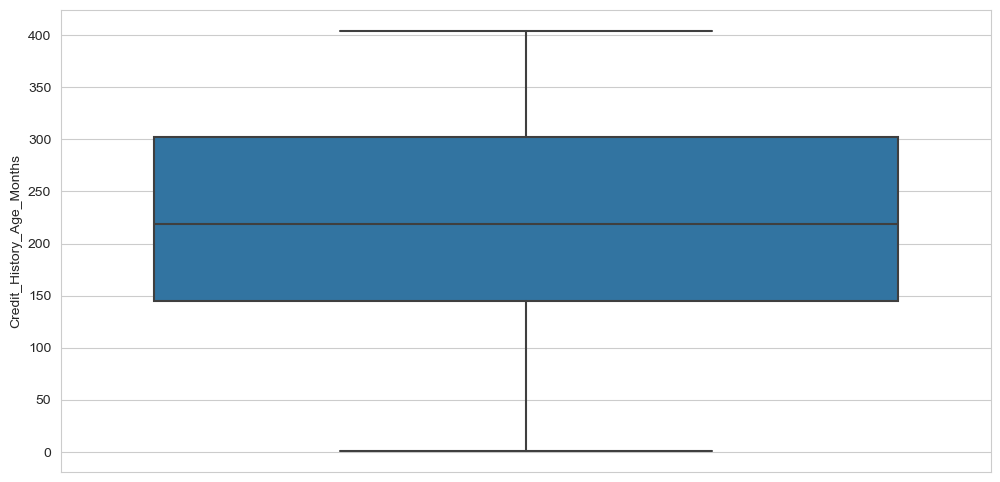

In [810]:
sns.boxplot(y='Credit_History_Age_Months', data=df);

## Missing Value Control

In [811]:
# missing value control
df.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
Credit_History_Age_Months    0
dtype: int64

There are no missing values left 💅

In [815]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50330 entries, 3 to 99997
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        50330 non-null  int32  
 1   Occupation                 50330 non-null  object 
 2   Annual_Income              50330 non-null  float64
 3   Num_Bank_Accounts          50330 non-null  int64  
 4   Num_Credit_Card            50330 non-null  int64  
 5   Interest_Rate              50330 non-null  int64  
 6   Num_of_Loan                50330 non-null  int32  
 7   Delay_from_due_date        50330 non-null  int64  
 8   Num_of_Delayed_Payment     50330 non-null  float64
 9   Num_Credit_Inquiries       50330 non-null  float64
 10  Credit_Mix                 50330 non-null  object 
 11  Outstanding_Debt           50330 non-null  float64
 12  Credit_Utilization_Ratio   50330 non-null  float64
 13  Payment_of_Min_Amount      50330 non-null  object 


# Feature Engineering

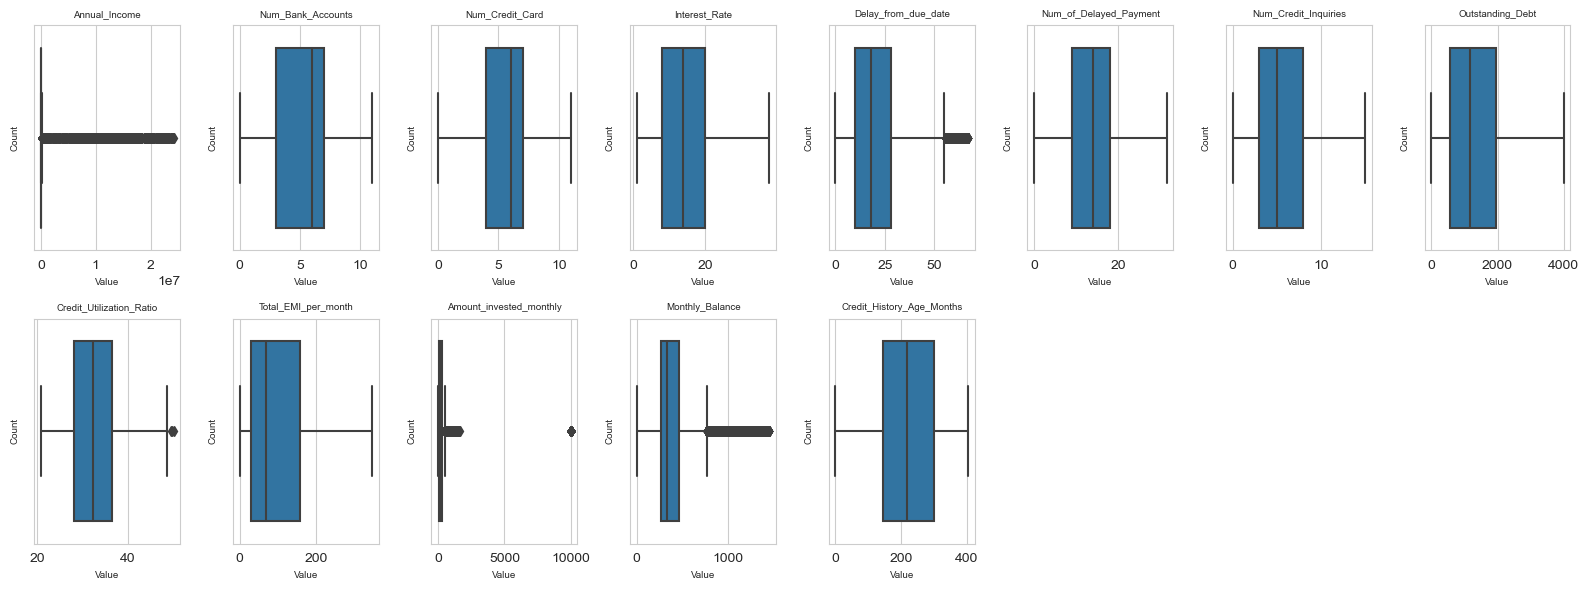

In [818]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Encoding

### Label Encoder

In [820]:
# Encoding Credit_Score

categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Score_Encoded'] = encoder.fit_transform(df[['Credit_Score']])

In [821]:
# Encoding Occupation

label_encoder = LabelEncoder()
df['Occupation_Encoded'] = label_encoder.fit_transform(df['Occupation'])

### Ordinal Encoder

In [823]:
# Encoding Credit_Mix
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

df['Credit_Mix_Encoded'] = encoder.fit_transform(df[['Credit_Mix']])

In [827]:
df.Payment_Behaviour.unique()

array(['LowspentSmallvaluepayments', 'HighspentLargevaluepayments',
       'LowspentMediumvaluepayments', 'HighspentMediumvaluepayments',
       'HighspentSmallvaluepayments', 'LowspentLargevaluepayments'],
      dtype=object)

In [828]:
# Encoding Payment_Behaviour
categories_payment_behaviour = [
    'LowspentSmallvaluepayments', 'HighspentLargevaluepayments',
       'LowspentMediumvaluepayments', 'HighspentMediumvaluepayments',
       'HighspentSmallvaluepayments', 'LowspentLargevaluepayments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

df['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(df[['Payment_Behaviour']])

**Dropping Unencoded columns**

In [830]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
df.drop(columns=columns_to_drop, inplace=True)

## New Features

It might help to increase % of accuracy and reduce amount of errors. 

In [832]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

df['Total_Num_Accounts'] = df['Num_Bank_Accounts'] + df['Num_Credit_Card']

# Calculate the total outstanding debt per account

df['Debt_Per_Account'] = df['Outstanding_Debt'] / df['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

df['Debt_to_Income_Ratio'] = df['Outstanding_Debt'] / df['Annual_Income']

# Calculate the total number of delayed payments per account

df['Delayed_Payments_Per_Account'] = df['Num_of_Delayed_Payment'] / df['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments) 

df['Total_Monthly_Expenses'] = df['Total_EMI_per_month'] + df['Amount_invested_monthly']

## 💯 Mutual Information Score (MI Score)

MI Score is a treasure! It will help you to recognize the most valuable variables for the prediction. Cool, right? 

In [835]:
from sklearn.feature_selection import mutual_info_classif

categorical_columns = df.select_dtypes(include=['object']).columns

data_encoded = df.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.021980171602181908
Feature 'Annual_Income': Mutual Information Score = 0.4687560959231465
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.10147236236198154
Feature 'Num_Credit_Card': Mutual Information Score = 0.10425608983795742
Feature 'Interest_Rate': Mutual Information Score = 0.16586287054516902
Feature 'Num_of_Loan': Mutual Information Score = 0.08372827792375226
Feature 'Delay_from_due_date': Mutual Information Score = 0.12301475712060417
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.0855564355870051
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.11602259492580158
Feature 'Outstanding_Debt': Mutual Information Score = 0.48153084420830705
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.00020650236625474605
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.10298906121379314
Feature 'Total_EMI_per_month': Mutual Information Score = 0.38095143074216464
Feature 'Amount_in

In [837]:
import plotly.graph_objs as go

sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'  

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

KEY 🗝️
______________________________________________________________________

Annual Income: With a high Mutual Information Score of 0.468, the annual income appears to be a significant predictor of credit score rate. Generally, individuals with higher annual incomes tend to have better credit scores.

Outstanding Debt: Another crucial factor is outstanding debt, which has a Mutual Information Score of 0.481. High levels of outstanding debt may negatively impact credit score rates.

Debt-to-Income Ratio: This feature also demonstrates a high importance with a Mutual Information Score of 0.478. It measures the proportion of a person's debt relative to their income and is a strong indicator of creditworthiness.

Total EMI per Month: Total Equated Monthly Installment (EMI) obligations carry a substantial weight (Mutual Information Score of 0.380) in predicting credit score rates. Higher EMI commitments might suggest higher financial stress and impact credit scores negatively.

Interest Rate: While not as high as the debt-related features, the interest rate still holds significant importance with a Mutual Information Score of 0.165. Higher interest rates may indicate riskier borrowing behavior and could negatively influence credit scores.  

______________________________________________________________________

✂️ Dropping low related values for MI Score

In [840]:
# Getting rid of columns which are not important for prediction. Even so we just created new features, some of them seems to be not effective for the model
# I tried to get rid of other columns. However, the prediction accuracy was harmed by that. 

columns_to_drop = [ 'Payment_of_Min_Amount', 'Age', 'Monthly_Balance', 'Total_Monthly_Expenses', 'Payment_Behaviour_Encoded', 'Amount_invested_monthly', 'Credit_Utilization_Ratio', 'Occupation_Encoded']
df.drop(columns=columns_to_drop, inplace=True)

## Correlation Matrix

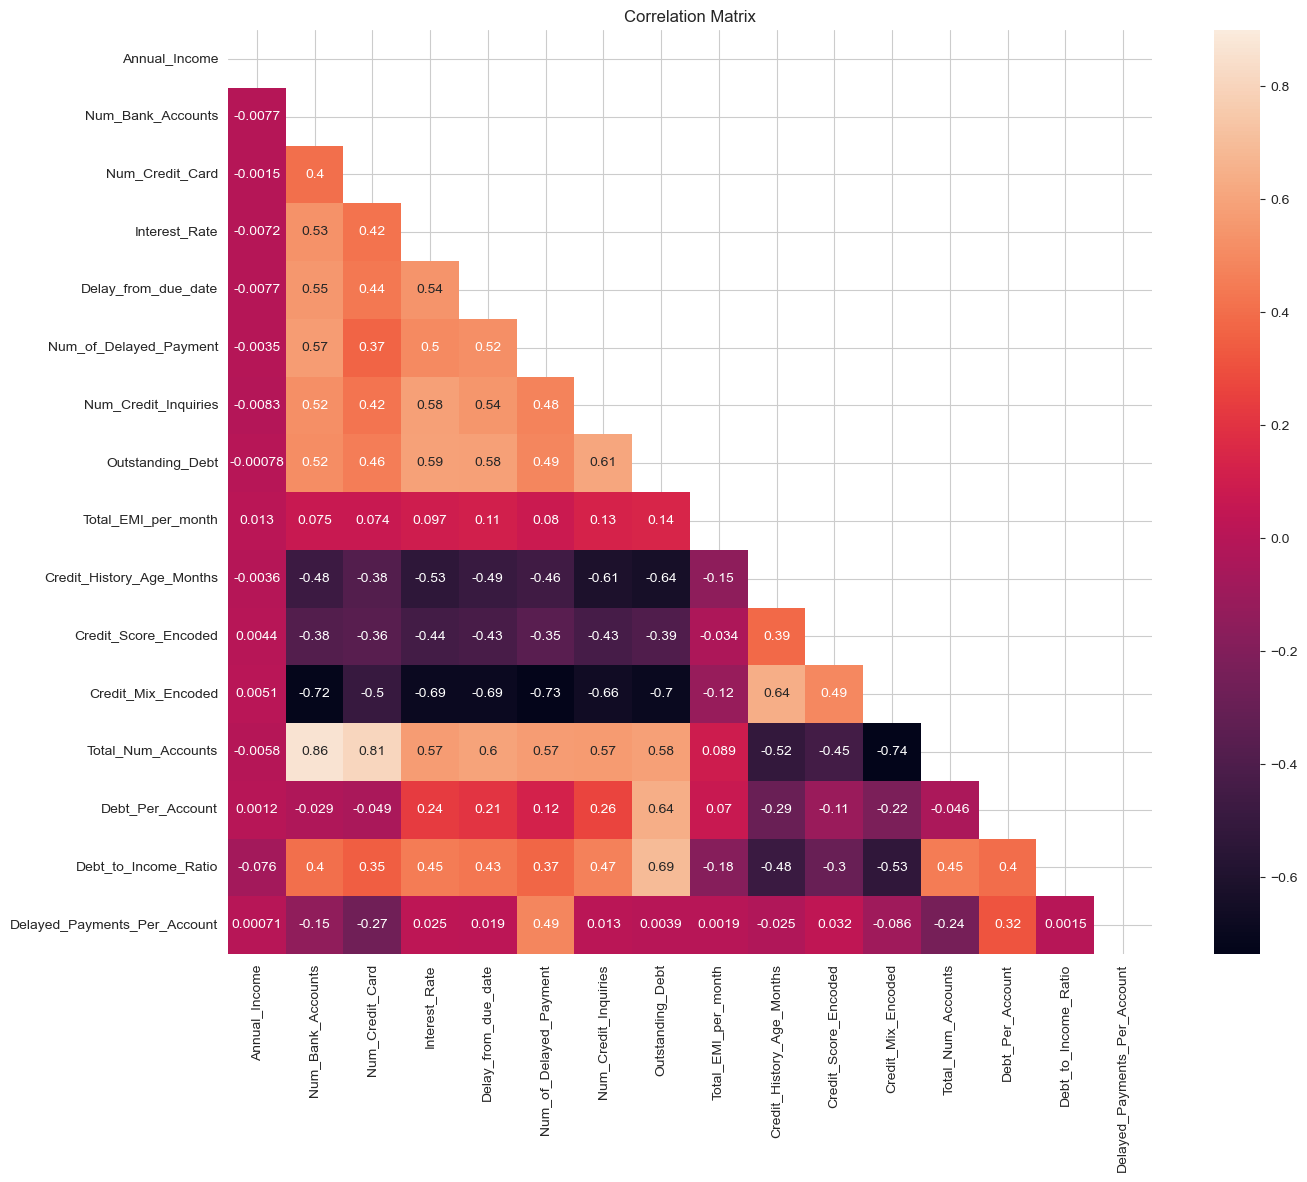

In [841]:
# Calculate Correlation Matrix

corr = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(16, 12))
sns.heatmap(corr, mask=mask, vmax=0.9, square=True, annot=True)
plt.title('Correlation Matrix')
plt.show()

KEY 🗝️
______________________________________________________________________

Financial Stability Indicators: Features such as 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', and 'Total_Num_Accounts' demonstrate positive correlations with each other and with the Credit score. This suggests that individuals with higher annual incomes or more diverse banking and credit card accounts tend to have higher credit scores.

Debt-related Metrics: 'Debt_to_Income_Ratio' and 'Debt_Per_Account' exhibit negative correlations with the Credit score. This indicates that individuals with higher debt-to-income ratios or greater debt per account tend to have lower credit scores. Furthermore, 'Outstanding_Debt' demonstrates a weaker negative correlation with the credit score, highlighting its impact on overall creditworthiness.

Credit Utilization and History: 'Total_EMI_per_month', representing monthly loan repayments, shows a positive correlation with the Credit score. Additionally, features related to credit history, such as 'Credit_History_Age_Months' and 'Credit_Mix_Encoded", suggests that individuals with longer credit histories, diverse credit accounts, and timely repayments tend to have higher credit scores.

Loan-related Factors: Features like 'Num_of_Loan' and 'Num_of_Delayed_Payment' indicate an individual's borrowing behavior and repayment patterns. This implies that individuals with fewer loan accounts or instances of delayed payments are more likely to have higher Credit scores.

Interest Rate and Financial Behavior: 'Interest_Rate' reveals a relationship with the Credit score, suggesting that individuals with lower Interest rates on their loans may have higher Credit scores. Moreover, 'Changed_Credit_Limit' and 'Num_Credit_Inquiries' also exhibit correlations, reflecting changes in credit limits and the frequency of credit inquiries, respectively.

______________________________________________________________________

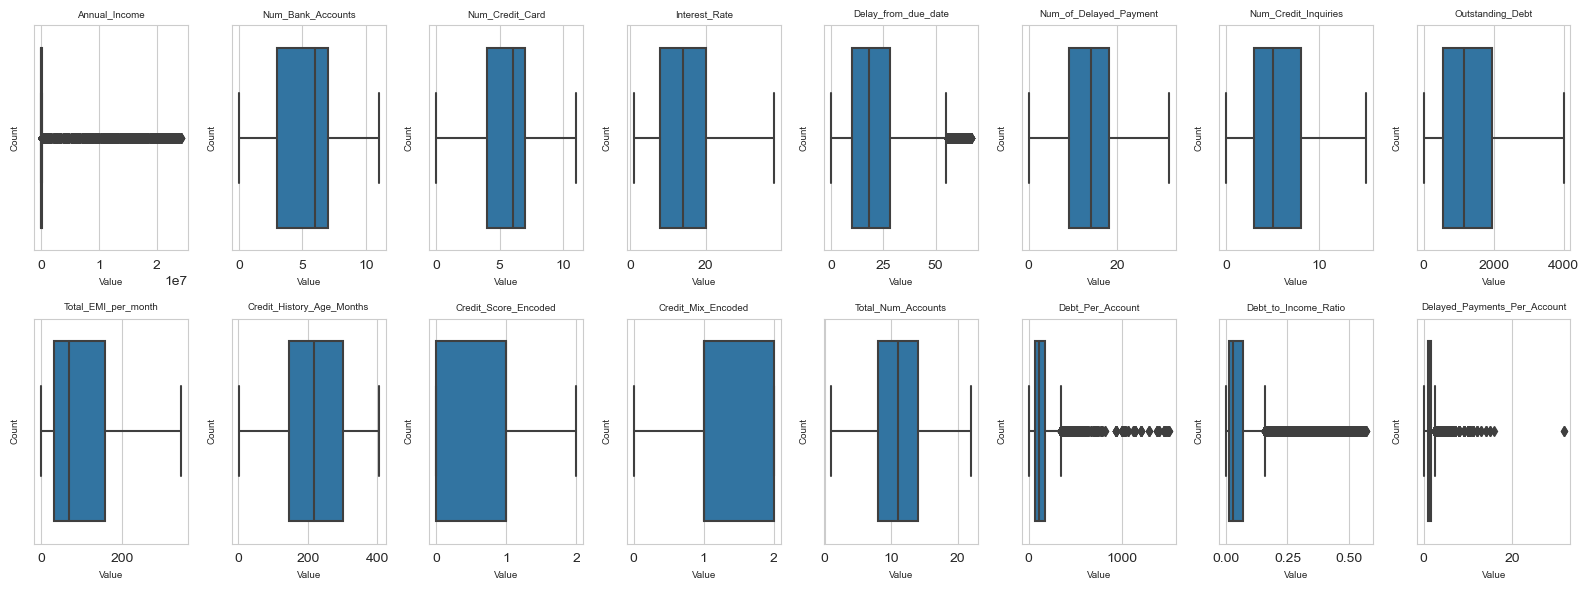

In [842]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)  
    axes[i].set_xlabel('Value', fontsize=7)  
    axes[i].set_ylabel('Count', fontsize=7)  

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [843]:
# df to csv
df.to_csv('Credit_Score_Cleaned_EDA.csv', index=False)

https://www.kaggle.com/code/romanniki/guide-97-acc-clean-ftrs-ml-fr-xgb-fc-s/notebook#4.2.1-%F0%9F%8F%B7%EF%B8%8F-Label-Encoder